In [4]:
# %pip install google-api-python-client pandas
# %pip install --upgrade google-auth-oauthlib google-auth-httplib2
# %pip install python-dotenv

[Collab Notebook](https://colab.research.google.com/drive/1ENxwDxwGJyawC37sb-ilAnrcWZkK61UL#scrollTo=f9qGyTZbOCSL)

In [1]:
#%pip install python-dotenv

import os
from dotenv import load_dotenv

#load environment variables
load_dotenv()

#get youtube api key
API_KEY = os.getenv("H_YOUTUBE_API_KEY")
if not API_KEY:
    raise ValueError("API key not found. Please ensure the '.env' file is set up correctly.")


In [2]:
from googleapiclient.discovery import build
import pandas as pd
youtube = build("youtube", "v3", developerKey=API_KEY)

# A. Start Scraping Youtube

## Video Information and Statistics

Items available for scraping:
<br><input type="checkbox"><label > video ID</label><br>
<input type="checkbox"><label > video URL</label><br>
<input type="checkbox"><label > video title</label><br>
<input type="checkbox"><label > video description</label><br>
<input type="checkbox"><label > video channel name</label><br>
<input type="checkbox"><label > video uploader ID (channel ID)</label><br>
<input type="checkbox"><label > video uploader date</label><br>
<input type="checkbox"><label > video thumbnail</label><br>
<input type="checkbox"><label > video tags</label><br>
<input type="checkbox"><label > video categories</label><br>
<input type="checkbox"><label > video is live</label><br>
<input type="checkbox"><label > video age restriction</label><br>
<input type="checkbox"><label > video length</label><br>
<input type="checkbox"><label > video view count</label><br>
<input type="checkbox"><label > video like count</label><br>
<input type="checkbox"><label > video dislike count</label><br>
<input type="checkbox"><label > video comment count</label><br>
<input type="checkbox"><label > video emoji count</label><br>

In [3]:

import re
def get_video_ids(video_urls):
    """
    Extract video IDs from a list of YouTube video URLs and return clean base URLs.
    """
    video_ids = []

    for url in video_urls:
        # Extract video ID using regex
        match = re.search(r"v=([^&]+)", url)
        if match:
            video_id = match.group(1)
            video_ids.append(video_id)
        else:
            print(f"No video ID found in URL: {url}. Please verify the link.")

    return video_ids
#v1: beauty product; v2, v3: tech product
original_urls = [
    "https://www.youtube.com/watch?v=cbTpCsFOFJc&t=8s",
    "https://www.youtube.com/watch?v=z19HM7ANZlo&t=476s",
    "https://www.youtube.com/watch?v=CAGbfYXERB4"]



video_ids = get_video_ids(original_urls)
video_ids

['cbTpCsFOFJc', 'z19HM7ANZlo', 'CAGbfYXERB4']

In [16]:
def get_video_stats(video_id):
    """
    Fetch statistics for a given video ID.
    """
    try:
        response = youtube.videos().list(
            part="snippet,statistics,contentDetails,liveStreamingDetails,paidProductPlacementDetails,status,topicDetails",
            id=video_id
        ).execute()
    except Exception as e:
        print(f"Error fetching video data: {e}")
        return None

    if not response.get("items"):
        print(f"No video found with ID: {video_id}")
        return None

    video_data = response["items"][0]

    stats = {
        "title": video_data.get("snippet", {}).get("title", ""),
        "description": video_data.get("snippet", {}).get("description", ""),
        "channelTitle": video_data.get("snippet", {}).get("channelTitle", ""),
        "publishTime": video_data.get("snippet", {}).get("publishedAt", ""),
        "channelId": video_data.get("snippet", {}).get("channelId", ""),
        "thumbnail": video_data.get("snippet", {}).get("thumbnails", {}).get("standard", {}).get("url", ""),
        "tags": video_data.get("snippet", {}).get("tags", []),
        "topicCategories": video_data.get("topicDetails", {}).get("topicCategories", []),
        "categoryId": video_data.get("snippet", {}).get("categoryId", None),
        "liveBroadcastContent": video_data.get("snippet", {}).get("liveBroadcastContent", None),
        "duration": video_data.get("contentDetails", {}).get("duration", None),
        "has_caption": video_data.get("contentDetails", {}).get("caption", None),
        "licensedContent": video_data.get("contentDetails", {}).get("licensedContent", None),
        "definition": video_data.get("contentDetails", {}).get("definition", None),
        "contentRating": video_data.get("contentDetails", {}).get("contentRating", None),
        "madeForKids": video_data.get("status", {}).get("madeForKids", None),
        "privacyStatus": video_data.get("status", {}).get("privacyStatus", None),
        "viewCount": video_data.get("statistics", {}).get("viewCount", None),
        "likeCount": video_data.get("statistics", {}).get("likeCount", None),
        "commentCount": video_data.get("statistics", {}).get("commentCount", None),
        "dislikeCount": video_data.get("statistics", {}).get("dislikeCount", None),
        "favoriteCount": video_data.get("statistics", {}).get("favoriteCount", None),
        "paidProductPlacement": video_data.get("paidProductPlacementDetails", {}).get("hasPaidProductPlacement", None)
    }
    return stats


In [5]:
stats_vid1 = get_video_stats(video_ids[0])
stats_vid1


{'title': 'I tried TikTok most viral Korean skincare products…an honest review (Not sponsored)',
 'description': "For more info check out my Instagram!! @cyounginyou\n\nHope you found this helpful! \nIf you have any questions leave them down below 🙌\n\n\n00:00 intro\n01:31 TiKTok viral cleansing oil 1\n02:07 TiKTok viral cleansing oil 2\n02:32 TiKTok viral cleansing oil 3\n03:20 TiKTok viral cleansing foam\n03:55 TiKTok viral toner 1\n04:30 TiKTok viral toner 2\n04:50 TikTok viral toner 3\n05:55 TikTok moisturizer 1\n07:14 TikTok moisturizer 2\n07:59 TiKTok viral sheet mask\n09:16 TiKTok lip\n10:06 outro\n10:12 Cyoung's pick sunscreen (Check out sunscreen video for more!)\n\n\n\n﹍﹍﹍﹍﹍﹍﹍﹍﹍﹍﹍﹍﹍﹍﹍﹍﹍﹍﹍﹍﹍﹍﹍\n\n\n▶P R O D U C T S \n\n[ANUA] Heartleaf Pore Control Cleansing Oil \n\nYesStyle / https://ystyle.co/9sud\nAmazon / https://amzn.to/3yt0yIw\nOlive Young / https://global.oliveyoung.com/if/rd?su=CMROVYZQ\n\n[Ma:nyo] Pure Cleansing Oil \n\nYesStyle / https://ystyle.co/AYDc\nAmazon / http

## Channel Statistics

Items available for scraping:
<br><input type="checkbox"><label > Channel ID</label><br>
<input type="checkbox"><label > Channel URL</label><br>
<input type="checkbox"><label > Channel title</label><br>
<input type="checkbox"><label > Channel description</label><br>
<input type="checkbox"><label > Channel name</label><br>
<input type="checkbox"><label > Channel country</label><br>
<input type="checkbox"><label > Channel thumbnail</label><br>
<input type="checkbox"><label > Channel tags</label><br>
<input type="checkbox"><label > Channel categories</label><br>
<input type="checkbox"><label > Channel view count</label><br>
<input type="checkbox"><label > Channel video count</label><br>
<input type="checkbox"><label > Channel subsciber count</label><br>
<input type="checkbox"><label > Channel live count</label><br>
<input type="checkbox"><label > Channel comment count</label><br>
<input type="checkbox"><label > Channel emoji count</label><br>


In [31]:
def get_channel_stats(channel_id):
    response = youtube.channels().list(
        part="snippet,statistics,contentDetails,topicDetails",
        id=channel_id
    ).execute()

    if not response["items"]:
        print(f"No channel found with ID: {channel_id}")
        return None

    channel_data = response["items"][0]
    stats = {
        "channel_title": channel_data["snippet"]["title"],
        "channel_description": channel_data["snippet"]["description"],
        "channel_custom_url": channel_data["snippet"]["customUrl"],
        "channel_thumbnail": channel_data["snippet"]["thumbnails"]["default"]["url"],
        "channel_published_at": channel_data["snippet"]["publishedAt"],
        "channel_view_count": channel_data["statistics"].get("viewCount", None),
        "channel_subscriber_count": channel_data["statistics"].get("subscriberCount", None),
        "channel_video_count": channel_data["statistics"].get("videoCount", None),
        "channel_playlist_count": channel_data["statistics"].get("playlistCount", None),
        "channel_comment_count": channel_data["statistics"].get("commentCount", None),
        "channel_live_count": channel_data["statistics"].get("liveCount", None),
        "channel_topic_categories": channel_data["topicDetails"].get("topicCategories", []),
        "channel_topic_ids": channel_data["topicDetails"].get("topicIds", []),
        "channel_country": channel_data["snippet"].get("country", None),
    }
    return stats

In [7]:
channel_stat_vid1 = get_channel_stats(stats_vid1["channelId"])
channel_stat_vid1

{'channel_title': 'CYoung',
 'channel_description': "Your Big Sis Advice No One tells you💕\n\nI’m CYoung, Broadcaster turned Pro MakeUp Artist and Beauty educator from Seoul, South Korea. I’m here to help you work out which K-beauty products are worth buying and which aren’t.\n\nI started this channel because I was frustrated that there weren't accurate and enough information of K-beauty in English. Come and join me to K-beauty land!\n\nFor business/PR enquiries: cyounginyou@gmail.com\n\n\n",
 'channel_custom_url': '@cyounginyou',
 'channel_thumbnail': 'https://yt3.ggpht.com/CVmSU2kGooURad2fHZCJQBAbjIIY0grG_Fg--p8S88G5gGOqoG466R9mu4AUqZOS_Usbd5Yx=s88-c-k-c0x00ffffff-no-rj',
 'channel_published_at': '2023-10-08T11:53:56.172395Z',
 'channel_view_count': '1477925',
 'channel_subscriber_count': '21300',
 'channel_video_count': '63',
 'channel_playlist_count': None,
 'channel_comment_count': None,
 'channel_live_count': None,
 'channel_topic_categories': ['https://en.wikipedia.org/wiki/Life

## Top Comment

In [8]:
# TESTING
comment_request = youtube.commentThreads().list(
    part="snippet",
    videoId=video_ids[0],
    #pageToken=next_page_token,
    textFormat="plainText",
    maxResults=100
)
comment_response = comment_request.execute()
comment_response

{'kind': 'youtube#commentThreadListResponse',
 'etag': 'tBH8t_r_EYbqQ-rHoNS_NW3KqDg',
 'nextPageToken': 'Z2V0X25ld2VzdF9maXJzdC0tQ2dnSWdBUVZGN2ZST0JJRkNLZ2dHQUFTQlFpSElCZ0FFZ1VJblNBWUFSSUZDSWtnR0FBU0JRaUlJQmdBSWc0S0RBaTc1cXEwQmhDQTY0S29BUQ==',
 'pageInfo': {'totalResults': 100, 'resultsPerPage': 100},
 'items': [{'kind': 'youtube#commentThread',
   'etag': 'SQLO_KM2Z3q-lxabp6q8Nql-7yc',
   'id': 'UgzC1cdveVxCI-edPQR4AaABAg',
   'snippet': {'channelId': 'UCFdi3igjh6--YqjX17M1lhA',
    'videoId': 'cbTpCsFOFJc',
    'topLevelComment': {'kind': 'youtube#comment',
     'etag': '7vffHC5-XJupZTqHd0Y6-n5VBi4',
     'id': 'UgzC1cdveVxCI-edPQR4AaABAg',
     'snippet': {'channelId': 'UCFdi3igjh6--YqjX17M1lhA',
      'videoId': 'cbTpCsFOFJc',
      'textDisplay': "What You SHOULD & SHOUDN'T Buy in Korean Skincare for Glow Skin\nhttps://youtu.be/wnVfubDqrkw?si=PQZHRe6I3vQuc0T7",
      'textOriginal': "What You SHOULD & SHOUDN'T Buy in Korean Skincare for Glow Skin\nhttps://youtu.be/wnVfubDqrkw?si=P

In [32]:
def get_comments(video_id, cmt_count=200, max_results=100):
    all_comments = []
    next_page_token = None
    search_pages = cmt_count // max_results
    if cmt_count % max_results:
        search_pages += 1
    for i in range(search_pages):
        try:
            comment_request = youtube.commentThreads().list(
                part="snippet",
                videoId=video_id,
                pageToken=next_page_token,
                textFormat="plainText",
                maxResults=max_results,
                order="relevance"
            )
            comment_response = comment_request.execute()

            for item in comment_response['items']:
                top_comment = item['snippet']['topLevelComment']['snippet']
                all_comments.append({
                    'Timestamp': top_comment['publishedAt'],
                    'Username': top_comment['authorDisplayName'],
                    'VideoID': video_id,  # Directly using video_id from function parameter
                    'Comment': top_comment['textDisplay'],
                    'Date': top_comment['updatedAt'] if 'updatedAt' in top_comment else top_comment['publishedAt'],
                    "likeCount": top_comment["likeCount"],
                    "totalReplyCount": item["snippet"]["totalReplyCount"],
                })
            print(f"Page {i + 1} of comments fetched for video {video_id}")
            next_page_token = comment_response.get('nextPageToken')
            if not next_page_token:
                break
        except Exception as e:
            print(f"Error occurred while fetching comments for video {video_id}: {str(e)}")
            continue

    return {"top_comments": all_comments}

In [55]:
comments_vid1 = get_comments(video_ids[0], cmt_count=50)
comments_vid1

NameError: name 'video_ids' is not defined

## 4. Get Video Transcript

In [11]:
from youtube_transcript_api import YouTubeTranscriptApi

trans_vid1 = YouTubeTranscriptApi.get_transcript(video_ids[0])
trans_vid1

[{'text': 'why the kar become popular because so I',
  'start': 1.599,
  'duration': 6.641},
 {'text': 'am so afraid to mention whenever you',
  'start': 4.6,
  'duration': 5.52},
 {'text': 'watch the Tik Tok before go to the',
  'start': 8.24,
  'duration': 6.479},
 {'text': 'website to buy it okay stop stop I got',
  'start': 10.12,
  'duration': 6.999},
 {'text': "to watch C's video it can be like a",
  'start': 14.719,
  'duration': 6.001},
 {'text': 'little North Star for you guys hello',
  'start': 17.119,
  'duration': 7.961},
 {'text': 'this is in you welcome back to my',
  'start': 20.72,
  'duration': 7.319},
 {'text': "channel my name is cang and I'm a TV",
  'start': 25.08,
  'duration': 6.599},
 {'text': 'broadcaster and also makeup B in to I',
  'start': 28.039,
  'duration': 5.721},
 {'text': 'posted a Tik Tok viral skincare review',
  'start': 31.679,
  'duration': 5.04},
 {'text': 'OMG there were so many comments you guys',
  'start': 33.76,
  'duration': 5.4},
 {'text

In [55]:
transcript_test = YouTubeTranscriptApi.list_transcripts(video_ids[0])
transcript_test._generated_transcripts, transcript_test._manually_created_transcripts

({'en': <youtube_transcript_api._transcripts.Transcript at 0x1be0e34f6e0>}, {})

In [33]:
from youtube_transcript_api import YouTubeTranscriptApi
def get_transcript(video_id):
    try:
        transcript_list = YouTubeTranscriptApi.list_transcripts(video_id)
        transcript = transcript_list.find_transcript(['en'])
        transcript_src =  transcript.fetch()
        transcript_txt = " ".join([line['text'] for line in transcript_src])
        generated = transcript.is_generated
        return {"transcript": transcript_txt, "transcript_is_generated": generated}
    except Exception as e:
        print(f"Error fetching transcript: {e}")
        print(f"English Transcript not found for video ID: {video_id}")
        return {"transcript": None, "transcript_is_generated": None}


In [7]:
#test get_transcript
transcript = get_transcript(video_ids[0])
transcript

NameError: name 'video_ids' is not defined

## 5. Combine to dataframe

In [15]:
ytb_data = []
for video_id in video_ids:
    #get video url
    video_url = {"video_id": video_id,"video_url": f"https://www.youtube.com/watch?v={video_id}"}
    #get video stats skipping if not found
    video_stats = get_video_stats(video_id)
    if video_stats is None:
        print(f"Not found video stats for video ID: {video_id}. Skipping...")
        continue
    #get channel stats skipping if not found
    channel_stats = get_channel_stats(video_stats["channelId"])
    if channel_stats is None:
        print(f"Not found channel stats for channel ID: {video_stats['channelId']}. Skipping...")
        continue
    comment = get_comments(youtube, video_id)
    transcript = get_transcript(video_id)
    #combine video and channel stats
    combined_stats = {**video_url, **video_stats, **channel_stats, **comment, **transcript}
    ytb_data.append(combined_stats)
    print(f"Video stats for video ID: {video_id} fetched and combined with channel stats. Data appended to ytb_data list.")

#convert to dataframe
ytb_df = pd.DataFrame(ytb_data)
ytb_df

Video stats for video ID: cbTpCsFOFJc fetched and combined with channel stats. Data appended to ytb_data list.
Video stats for video ID: z19HM7ANZlo fetched and combined with channel stats. Data appended to ytb_data list.
Video stats for video ID: CAGbfYXERB4 fetched and combined with channel stats. Data appended to ytb_data list.


,video_id,video_url,title,description,channelTitle,publishTime,channelId,thumbnail,tags,topicCategories,...,channel_video_count,channel_playlist_count,channel_comment_count,channel_live_count,channel_topic_categories,channel_topic_ids,channel_country,top_comments,transcript,transcript_is_generated
0,cbTpCsFOFJc,https://www.youtube.com/watch?v=cbTpCsFOFJc,I tried TikTok most viral Korean skincare prod...,For more info check out my Instagram!! @cyoung...,CYoung,2024-05-13T14:19:29Z,UCFdi3igjh6--YqjX17M1lhA,https://i.ytimg.com/vi/cbTpCsFOFJc/sddefault.jpg,"[Korean skincare, TikTok skincare, Cleansing o...",[https://en.wikipedia.org/wiki/Lifestyle_(soci...,...,63,None,None,None,[https://en.wikipedia.org/wiki/Lifestyle_(soci...,[/m/019_rr],KR,"[{'Timestamp': '2024-05-23T12:34:17Z', 'Userna...",why the kar become popular because so I am so ...,True
1,z19HM7ANZlo,https://www.youtube.com/watch?v=z19HM7ANZlo,The M4 Mac Mini is Incredible!,The new $599 M4 Mac Mini is really good. In mo...,Marques Brownlee,2024-11-07T14:00:39Z,UCBJycsmduvYEL83R_U4JriQ,https://i.ytimg.com/vi/z19HM7ANZlo/sddefault.jpg,"[Mac Mini, M4, M4 Mac Mini, Mac Mini M4, Mac M...",[https://en.wikipedia.org/wiki/Lifestyle_(soci...,...,1706,None,None,None,"[https://en.wikipedia.org/wiki/Technology, htt...","[/m/07c1v, /m/019_rr]",US,"[{'Timestamp': '2024-11-07T15:40:00Z', 'Userna...",(box clunks) (tape tearing) (chilled lo-fi mus...,False
2,CAGbfYXERB4,https://www.youtube.com/watch?v=CAGbfYXERB4,M4 Mac Mini is unreal!,Sub to our podcast: http://youtube.com/samebra...,iJustine,2024-11-07T16:50:45Z,UCey_c7U86mJGz1VJWH5CYPA,https://i.ytimg.com/vi/CAGbfYXERB4/sddefault.jpg,"[ijustine, Justine Ezarik, iJustine Tech, iJus...",[https://en.wikipedia.org/wiki/Lifestyle_(soci...,...,2603,None,None,None,"[https://en.wikipedia.org/wiki/Technology, htt...","[/m/07c1v, /m/019_rr]",US,"[{'Timestamp': '2024-11-13T22:11:55Z', 'Userna...",[Music] hey everyone guess what we've got the ...,True


In [16]:
#save to csv
ytb_df.to_csv("ytb_data.csv", index=False)
print(f"Data saved to ytb_data.csv")

Data saved to ytb_data.csv


# B. Search for Youtube videos by Keywords

In [17]:
search_items = {
    "Beauty": {
        "total_videos": 30, # not used at the moment
        "categories": [
            "Makeup product",
            "Skincare product",
            "Haircare product",
        ]
    },
    "Fashion": {
        "total_videos": 30, # not used at the moment
        "categories": [
            "Seasonal apparel",
            "Running shoes",
            #"Accessories",
        ]
    },
    "Food": {
        "total_videos": 30, # not used at the moment
        "categories": [
            "Vegan or gluten-free products",
            "Diet products",
            "Functional food or beverages",
            #"Meal kits or Subscription boxes",
            #"Gourmet Items",
            #"Desserts",
        ]
    },
    "Automobile": {
        "total_videos": 30, # not used at the moment
        "categories": [
            "Electric Vehicles",
            "SUVs and Family Cars",
            #"Luxury Cars (e.g., Tesla Model S, Mercedes-Benz S-Class)",
            #"Off-Road Vehicles (e.g., Jeep Wrangler, Ford Bronco)",
            #"Customizable Cars (e.g., Subaru WRX, Ford Mustang)",
            #"Compact City Cars (e.g., Mini Cooper, Honda Fit)",
        ]
    },
    "Electronics": {
        "total_videos": 30, # not used at the moment
        "categories": [
            "Smartphones",
            "Laptops",
            "Tablets",
            "Wearables",
        ]
    },
    "Home": {
        "total_videos": 30, # not used at the moment
        "categories": [
            "Home Office Furniture",
            "Smart Kitchen Appliances",
            #"Mattresses",
            #"sofas and Chairs",
        ]
    },
    "Travel": {
        "total_videos": 30, # not used at the moment
        "categories": [
            "Luggage and Travel Bags",
            "Travel Accessories ",
            "Travel Booking Platforms",
        ]
    },
    "Entertainment": {
        "total_videos": 30, # not used at the moment
        "categories": [
            "Streaming Services",
            "Gaming Consoles",
            #"VR and AR Entertainment (Virtual Reality Headsets)",
        ]
    },
    "Wellness": {
        "total_videos": 30, # not used at the moment
        "categories": [
            "Nutritional Supplements",
            "Fitness Trackers and Smartwatches",
            "Home Workout Equipment",
        ]
    },
    "Industry": {
        "total_videos": 30, # not used at the moment
        "categories": [
            "Beauty Products",
        ]
    }
}


In [8]:
import time
import json
def search_videos_by_keyword(product_type, product_name, region='US', language="en", video_quality="any", video_duration="any", videos_count = 100, order="viewCount", published_start = '2023-01-01T00:00:00Z', published_end = '2024-12-31T23:59:59Z', token=None):
    """
    Search for videos by keyword and return a list of video IDs.
    Search filtering options:
    - product_type: The type of product being reviewed/by industry.
    - product_name: The name of the product being reviewed.
    - region: The region code to filter the search results (default is US).
    - language: The language of the search results (default is English).
    - video_quality: The quality of the videos to filter the search results (default is any). other options: any, high (Only get HD videos), standard (Only get SD videos).
    - video_duration: The duration of the videos to filter the search results (default is medium). other options: any, long (video duration >= 20 mins), medium (4 mins <= video duration <= 20 mins), short (video duration < 4 mins).
    - videos_count: The total number of videos to fetch (default is 100).
    - order: The order in which to list the videos (default is view count). other options: date ( sorted in reverse chronological order), rating (sorted from highest to lowest rating), relevance (sorted based on their relevance to the search query), title (sorted alphabetically by title), videoCount (Channels are sorted in descending order of their number of uploaded videos), viewCount (sorted from highest to lowest number of views).
    - published_start: The start date and time for the search results (default is first day of 2023 i.e. 2023-01-01T00:00:00Z).
    - published_end: The end date and time for the search results (default is last day of 2024 i.e. 2024-12-31T23:59:59Z).
    - token: The page token to fetch the next page of results.
    """
    
    keyword = f"{product_type} review" # change to product_type or other keywords if needed
    cache_json = {'keyword' : keyword}
    response_list = []
    max_results_per_page = 50
    pages = videos_count // max_results_per_page
    if videos_count % max_results_per_page:
        pages += 1
    for i in range(pages):
        request = youtube.search().list(
            part="snippet",
            maxResults=50,
            q=keyword,
            order=order, 
            type="video",
            regionCode=region,
            relevanceLanguage=language,
            videoDuration=video_duration,
            publishedAfter=published_start,
            publishedBefore=published_end,
            pageToken=token,
            videoDefinition=video_quality
        )
        response = request.execute()
        response_list.append(response)
        # print the total number of videos found in pageInfo and the page token
        print(f"Page {i+1}: {response['pageInfo']['totalResults']} videos found. Next page token: {response.get('nextPageToken')}")
        
        token = response.get("nextPageToken")
        if not token:
            break
        # sleep for 1 second to avoid hitting the API rate limit
        time.sleep(1)

    cache_json['response_list'] = response_list
    # save the response to a cache file
    with open(f'ytb_search_cache_{product_type}.json', 'w') as f:
        json.dump(cache_json, f, indent=4, ensure_ascii=False)
    ytb_search_data = []
    # Extract the video information from the API response
    for response in response_list:
        for item in response["items"]:
            product_type = product_type
            product_name = product_name
            video_id = item["id"]["videoId"]
            video_url = f"https://www.youtube.com/watch?v={video_id}"
            video_title = item["snippet"]["title"]
            video_description = item["snippet"]["description"]
            video_channel = item["snippet"]["channelTitle"]
            video_channel_id = item["snippet"]["channelId"]
            video_published = item["snippet"]["publishedAt"]
            video_thumbnail = item["snippet"]["thumbnails"]["default"]["url"]

            video_data = {
                "product_type": product_type,
                "product_name": product_name,
                "video_id": video_id,
                "video_url": video_url,
                "video_title": video_title,
                "video_description": video_description,
                "video_channel": video_channel,
                "video_channel_id": video_channel_id,
                "video_published": video_published,
                "video_thumbnail": video_thumbnail
            }
            ytb_search_data.append(video_data)

    return ytb_search_data

Prioritize the closest year (2024) >> 2023

In [ ]:
all_search_results = []
keyword="lululemon align pants"

print(f"Searching for videos by keyword: {keyword} for 2024 videos...")
all_search_results_2024 = search_videos_by_keyword(product_type=keyword, product_name="", videos_count=500, order="relevance", region="US", language="en", video_duration="medium", published_start='2024-01-01T00:00:00Z', published_end='2024-12-31T23:59:59Z')
all_search_results.extend(all_search_results_2024)



Searching for videos by keyword: lululemon align pants for 2024 videos...
Page 1: 258 videos found. Next page token: CDIQAA
Page 2: 258 videos found. Next page token: CGQQAA
Page 3: 257 videos found. Next page token: CJYBEAA
Page 4: 256 videos found. Next page token: CMgBEAA
Page 5: 255 videos found. Next page token: None


In [83]:
print(f"Searching for videos by keyword: {keyword} for 2023 videos...")
all_search_results_2023 = search_videos_by_keyword(product_type=keyword, product_name="", videos_count=500, order="relevance", region="US", language="en", video_duration="medium", published_start='2023-01-01T00:00:00Z', published_end='2023-12-31T23:59:59Z')
all_search_results.extend(all_search_results_2023)

Searching for videos by keyword: lululemon align pants for 2023 videos...
Page 1: 4943 videos found. Next page token: CDIQAA
Page 2: 4931 videos found. Next page token: CGQQAA
Page 3: 4931 videos found. Next page token: CJYBEAA
Page 4: 5012 videos found. Next page token: CMgBEAA
Page 5: 4968 videos found. Next page token: CPoBEAA
Page 6: 4941 videos found. Next page token: CKwCEAA
Page 7: 4929 videos found. Next page token: CN4CEAA
Page 8: 4929 videos found. Next page token: CJADEAA
Page 9: 4966 videos found. Next page token: CMIDEAA
Page 10: 5010 videos found. Next page token: None


In [86]:
len(all_search_results_2024)

230

In [87]:
# all_search_results is 200 videos from all_search_results_2024 and 300 videos from all_search_results_2023
all_search_results_filtered = []
all_search_results_2023_filtered = all_search_results_2023[:300]
all_search_results_2024_filtered = all_search_results_2024[:200]
all_search_results_filtered.extend(all_search_results_2023_filtered)
all_search_results_filtered.extend(all_search_results_2024_filtered)

In [90]:
all_search_results = all_search_results_filtered
len(all_search_results_filtered)

500

In [91]:
all_search_results

[{'product_type': 'lululemon align pants',
  'product_name': '',
  'video_id': 'sNZYR0gl7zo',
  'video_url': 'https://www.youtube.com/watch?v=sNZYR0gl7zo',
  'video_title': 'LULULEMON ALIGN VS WUNDER TRAIN LEGGINGS UPDATED',
  'video_description': "Hi Hi Hi! Lululemon switched up their wunder train leggings and their aligns some of their most famous leggings so we're going to ...",
  'video_channel': 'Maya',
  'video_channel_id': 'UCg8mp8FO35KOeJeEbcJm9hg',
  'video_published': '2023-03-17T15:00:44Z',
  'video_thumbnail': 'https://i.ytimg.com/vi/sNZYR0gl7zo/default.jpg'},
 {'product_type': 'lululemon align pants',
  'product_name': '',
  'video_id': 'pE-jNu4i19M',
  'video_url': 'https://www.youtube.com/watch?v=pE-jNu4i19M',
  'video_title': 'What does it cost to make Lululemon Align leggings?? Lululemon review',
  'video_description': "Instagram / Tik Tok: @Shiftfashiongroup Joe's Instagram: @joe.ng_ This week on What it costs we take a look at the #lululemon ...",
  'video_channel': 

In [92]:
import os
import json
import pandas as pd

keyword_file = keyword.replace(" ", "_").lower()

# Define cache file path
CACHE_FILE = f"video_stats_cache_{keyword_file}.json"

# Load cache if it exists, or initialize an empty cache
if os.path.exists(CACHE_FILE):
    with open(CACHE_FILE, "r") as f:
        video_stats_cache = json.load(f)
else:
    video_stats_cache = {}

testing_search = []
for result in all_search_results:
    video_id = result["video_id"]
    if video_id in video_stats_cache:
        # Use cached data
        video_stats = video_stats_cache[video_id]
        print(f"Using cached data for video ID: {video_id}")
    else:
        # Fetch data from API
        video_stats = get_video_stats(video_id)
        if video_stats:
            # Update cache
            video_stats_cache[video_id] = video_stats
            # Save cache to file
            with open(CACHE_FILE, "w") as f:
                json.dump(video_stats_cache, f)
            print(f"Fetched and cached data for video ID: {video_id}")
        else:
            print(f"Failed to fetch data for video ID: {video_id}")
            continue  # Skip to the next result if API call fails

    # Update result with video stats and add to the list
    result.update(video_stats)
    testing_search.append(result)

print(f"Total videos processed: {len(testing_search)}")

# Convert to DataFrame and save
ytb_search_df = pd.DataFrame(testing_search)
output_file = f"ytb_search_results_{keyword_file}.csv"
ytb_search_df.to_csv(output_file, index=False)
print(f"Data saved to {output_file}")


Fetched and cached data for video ID: sNZYR0gl7zo
Fetched and cached data for video ID: pE-jNu4i19M
Fetched and cached data for video ID: DTfjUYtZvWU
Fetched and cached data for video ID: Zuqq0v-scMw
Fetched and cached data for video ID: mzKdQ3ELRHo
Fetched and cached data for video ID: -tnStJbD2s0
Fetched and cached data for video ID: ig8XBJ0ANZE
Fetched and cached data for video ID: OFC6866KkBI
Fetched and cached data for video ID: NE2S_WDihww
Fetched and cached data for video ID: 1XNGEv7iUUI
Fetched and cached data for video ID: nYsp8qtq0eA
Fetched and cached data for video ID: 4DzlnXXhLQ0
Fetched and cached data for video ID: -6Jt37gtCZU
Fetched and cached data for video ID: Btg0flJzTGM
Fetched and cached data for video ID: 8CSPzC_o8L4
Fetched and cached data for video ID: m_ji5Fx4Nm8
Fetched and cached data for video ID: 3IMctLi320E
Fetched and cached data for video ID: axCHoIsR63M
Fetched and cached data for video ID: So4jGEEpLoM
Fetched and cached data for video ID: P_bcP12MO7k


In [93]:
ytb_search_df

,product_type,product_name,video_id,video_url,video_title,video_description,video_channel,video_channel_id,video_published,video_thumbnail,...,definition,contentRating,madeForKids,privacyStatus,viewCount,likeCount,commentCount,dislikeCount,favoriteCount,paidProductPlacement
0,lululemon align pants,,sNZYR0gl7zo,https://www.youtube.com/watch?v=sNZYR0gl7zo,LULULEMON ALIGN VS WUNDER TRAIN LEGGINGS UPDATED,Hi Hi Hi! Lululemon switched up their wunder t...,Maya,UCg8mp8FO35KOeJeEbcJm9hg,2023-03-17T15:00:44Z,https://i.ytimg.com/vi/sNZYR0gl7zo/default.jpg,...,hd,{},False,public,36288,279,40,None,0,False
1,lululemon align pants,,pE-jNu4i19M,https://www.youtube.com/watch?v=pE-jNu4i19M,What does it cost to make Lululemon Align legg...,Instagram / Tik Tok: @Shiftfashiongroup Joe's ...,Shiftfashiongroup,UC5Bs2BXfOU8VdQDNBIjHEew,2023-10-02T23:00:06Z,https://i.ytimg.com/vi/pE-jNu4i19M/default.jpg,...,hd,{},False,public,12160,257,18,None,0,False
2,lululemon align pants,,DTfjUYtZvWU,https://www.youtube.com/watch?v=DTfjUYtZvWU,LULULEMON *Align* vs. *Wunder Train* 23&quot; ...,Get at least $30 on your 1st purchase via Raku...,Tawny Alessandra,UCNHIo8cvEL-Flfg-YdJRyrg,2023-07-05T21:06:25Z,https://i.ytimg.com/vi/DTfjUYtZvWU/default.jpg,...,hd,{},False,public,10266,70,2,None,0,False
3,lululemon align pants,,Zuqq0v-scMw,https://www.youtube.com/watch?v=Zuqq0v-scMw,Lululemon Groove Super-High-Rise Flared Pant v...,Get at least $30 on your 1st purchase via Raku...,Tawny Alessandra,UCNHIo8cvEL-Flfg-YdJRyrg,2023-02-23T22:06:32Z,https://i.ytimg.com/vi/Zuqq0v-scMw/default.jpg,...,hd,{},False,public,21149,127,17,None,0,False
4,lululemon align pants,,mzKdQ3ELRHo,https://www.youtube.com/watch?v=mzKdQ3ELRHo,"Lululemon Groove Flared Pants Review | Sizing,...",Subscribe for more and let's be Luxe besties ♡...,Luxe by Angela,UCPHUcBNJgkvCGcrLSnCM5GA,2023-04-20T16:00:36Z,https://i.ytimg.com/vi/mzKdQ3ELRHo/default.jpg,...,hd,{},False,public,12894,128,18,None,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,lululemon align pants,,8jhsmfeEOys,https://www.youtube.com/watch?v=8jhsmfeEOys,Halara Black Friday Sale Up to 80% Off | My To...,halarablackfriday #halara #halarahaul Coupon c...,Hotmess Momma Vlogs,UCHb7zVC1mahUD0ZE7FzkFdg,2024-11-22T02:00:08Z,https://i.ytimg.com/vi/8jhsmfeEOys/default.jpg,...,hd,{},False,public,3013,302,27,None,0,False
496,lululemon align pants,,QEkAeKCY0ug,https://www.youtube.com/watch?v=QEkAeKCY0ug,Halara Must Have Dresses and Pants Try on for ...,Coupon code: hill15 to enjoy 15% off on full-p...,Janelle Hill,UCvgG7ppyt9lXayoIsAGk_xw,2024-02-15T20:53:34Z,https://i.ytimg.com/vi/QEkAeKCY0ug/default.jpg,...,hd,{},False,public,1137,83,3,None,0,False
497,lululemon align pants,,3PnSxzsa1vE,https://www.youtube.com/watch?v=3PnSxzsa1vE,SUMMER ESSENTIALS to look &amp; feel your best...,cancelling IT girl summer and manifesting HAPP...,Kerina Wang,UCa9siXYE9McabZSTOkhnUtg,2024-06-22T16:00:03Z,https://i.ytimg.com/vi/3PnSxzsa1vE/default.jpg,...,hd,{},False,public,36976,1496,49,None,0,False
498,lululemon align pants,,BGhZxgQ1k9s,https://www.youtube.com/watch?v=BGhZxgQ1k9s,Amazon Fall Fashion 2024 - Amazon Fashion - Am...,Amazon Fall Fashion 2024 - Amazon Fashion - Am...,Stacy Rody,UCDPAdnwsrlktmmvHhIkzj2Q,2024-12-09T18:51:45Z,https://i.ytimg.com/vi/BGhZxgQ1k9s/default.jpg,...,hd,{},False,public,879,38,7,None,0,False


In [94]:
#ytb_search_df_filtered

# add transcript for each video by applying get_transcript function, it returns a dictionary with transcript and transcript_is_generated
ytb_trans_data = []
for video_id in ytb_search_df["video_id"]:
    transcript = get_transcript(video_id) 
    ytb_trans_data.append(transcript)
    print(f"Transcript for video ID: {video_id} fetched and appended to ytb_search_data list.")

# unpack the list of dictionaries into a DataFrame
ytb_trans_df = pd.DataFrame(ytb_trans_data)
ytb_search_df = ytb_search_df.reset_index(drop=True)
# append the transcript data to the existing DataFrame
ytb_search_df = pd.concat([ytb_search_df, ytb_trans_df], axis=1)




Transcript for video ID: sNZYR0gl7zo fetched and appended to ytb_search_data list.
Transcript for video ID: pE-jNu4i19M fetched and appended to ytb_search_data list.
Transcript for video ID: DTfjUYtZvWU fetched and appended to ytb_search_data list.
Transcript for video ID: Zuqq0v-scMw fetched and appended to ytb_search_data list.
Transcript for video ID: mzKdQ3ELRHo fetched and appended to ytb_search_data list.
Transcript for video ID: -tnStJbD2s0 fetched and appended to ytb_search_data list.
Transcript for video ID: ig8XBJ0ANZE fetched and appended to ytb_search_data list.
Transcript for video ID: OFC6866KkBI fetched and appended to ytb_search_data list.
Transcript for video ID: NE2S_WDihww fetched and appended to ytb_search_data list.
Transcript for video ID: 1XNGEv7iUUI fetched and appended to ytb_search_data list.
Transcript for video ID: nYsp8qtq0eA fetched and appended to ytb_search_data list.
Transcript for video ID: 4DzlnXXhLQ0 fetched and appended to ytb_search_data list.
Tran

In [95]:
ytb_search_df

,product_type,product_name,video_id,video_url,video_title,video_description,video_channel,video_channel_id,video_published,video_thumbnail,...,madeForKids,privacyStatus,viewCount,likeCount,commentCount,dislikeCount,favoriteCount,paidProductPlacement,transcript,transcript_is_generated
0,lululemon align pants,,sNZYR0gl7zo,https://www.youtube.com/watch?v=sNZYR0gl7zo,LULULEMON ALIGN VS WUNDER TRAIN LEGGINGS UPDATED,Hi Hi Hi! Lululemon switched up their wunder t...,Maya,UCg8mp8FO35KOeJeEbcJm9hg,2023-03-17T15:00:44Z,https://i.ytimg.com/vi/sNZYR0gl7zo/default.jpg,...,False,public,36288,279,40,None,0,False,foreign [Music] and welcome back to my channel...,True
1,lululemon align pants,,pE-jNu4i19M,https://www.youtube.com/watch?v=pE-jNu4i19M,What does it cost to make Lululemon Align legg...,Instagram / Tik Tok: @Shiftfashiongroup Joe's ...,Shiftfashiongroup,UC5Bs2BXfOU8VdQDNBIjHEew,2023-10-02T23:00:06Z,https://i.ytimg.com/vi/pE-jNu4i19M/default.jpg,...,False,public,12160,257,18,None,0,False,all right what do you got for me today and all...,True
2,lululemon align pants,,DTfjUYtZvWU,https://www.youtube.com/watch?v=DTfjUYtZvWU,LULULEMON *Align* vs. *Wunder Train* 23&quot; ...,Get at least $30 on your 1st purchase via Raku...,Tawny Alessandra,UCNHIo8cvEL-Flfg-YdJRyrg,2023-07-05T21:06:25Z,https://i.ytimg.com/vi/DTfjUYtZvWU/default.jpg,...,False,public,10266,70,2,None,0,False,hey guys welcome back to my channel if you're ...,True
3,lululemon align pants,,Zuqq0v-scMw,https://www.youtube.com/watch?v=Zuqq0v-scMw,Lululemon Groove Super-High-Rise Flared Pant v...,Get at least $30 on your 1st purchase via Raku...,Tawny Alessandra,UCNHIo8cvEL-Flfg-YdJRyrg,2023-02-23T22:06:32Z,https://i.ytimg.com/vi/Zuqq0v-scMw/default.jpg,...,False,public,21149,127,17,None,0,False,hey guys welcome back to my channel if you're ...,True
4,lululemon align pants,,mzKdQ3ELRHo,https://www.youtube.com/watch?v=mzKdQ3ELRHo,"Lululemon Groove Flared Pants Review | Sizing,...",Subscribe for more and let's be Luxe besties ♡...,Luxe by Angela,UCPHUcBNJgkvCGcrLSnCM5GA,2023-04-20T16:00:36Z,https://i.ytimg.com/vi/mzKdQ3ELRHo/default.jpg,...,False,public,12894,128,18,None,0,False,hey guys welcome back to my channel and welcom...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,lululemon align pants,,8jhsmfeEOys,https://www.youtube.com/watch?v=8jhsmfeEOys,Halara Black Friday Sale Up to 80% Off | My To...,halarablackfriday #halara #halarahaul Coupon c...,Hotmess Momma Vlogs,UCHb7zVC1mahUD0ZE7FzkFdg,2024-11-22T02:00:08Z,https://i.ytimg.com/vi/8jhsmfeEOys/default.jpg,...,False,public,3013,302,27,None,0,False,Black Friday deals going on at halara oh y'all...,True
496,lululemon align pants,,QEkAeKCY0ug,https://www.youtube.com/watch?v=QEkAeKCY0ug,Halara Must Have Dresses and Pants Try on for ...,Coupon code: hill15 to enjoy 15% off on full-p...,Janelle Hill,UCvgG7ppyt9lXayoIsAGk_xw,2024-02-15T20:53:34Z,https://i.ytimg.com/vi/QEkAeKCY0ug/default.jpg,...,False,public,1137,83,3,None,0,False,hi YouTube and welcome back to my [Laughter] C...,True
497,lululemon align pants,,3PnSxzsa1vE,https://www.youtube.com/watch?v=3PnSxzsa1vE,SUMMER ESSENTIALS to look &amp; feel your best...,cancelling IT girl summer and manifesting HAPP...,Kerina Wang,UCa9siXYE9McabZSTOkhnUtg,2024-06-22T16:00:03Z,https://i.ytimg.com/vi/3PnSxzsa1vE/default.jpg,...,False,public,36976,1496,49,None,0,False,I have had it up to here with the amount of co...,True
498,lululemon align pants,,BGhZxgQ1k9s,https://www.youtube.com/watch?v=BGhZxgQ1k9s,Amazon Fall Fashion 2024 - Amazon Fashion - Am...,Amazon Fall Fashion 2024 - Amazon Fashion - Am...,Stacy Rody,UCDPAdnwsrlktmmvHhIkzj2Q,2024-12-09T18:51:45Z,https://i.ytimg.com/vi/BGhZxgQ1k9s/default.jpg,...,False,public,879,38,7,None,0,False,hey guys I'm so excited to be back this week w...,True


In [23]:
# test search
published_start = '2023-01-01T00:00:00Z'
published_end = '2024-12-31T23:59:59Z'
request = youtube.search().list(
    part="snippet",
    maxResults=100,
    q="beauty product review",
    order="relevance", 
    type="video",
    regionCode="US",
    relevanceLanguage="en",
    videoDuration="any",
    publishedAfter=published_start,
    publishedBefore=published_end,
    pageToken=None,
    videoDefinition="any"
)
response = request.execute()

In [24]:
len(response["items"]), response

(50,
 {'kind': 'youtube#searchListResponse',
  'etag': '2WyGfXS8BdAEW7AKjbQMi-cnd_U',
  'nextPageToken': 'CDIQAA',
  'regionCode': 'US',
  'pageInfo': {'totalResults': 1000000, 'resultsPerPage': 50},
  'items': [{'kind': 'youtube#searchResult',
    'etag': 'qR-ogEzwnKkZxJPL6LRnIn9GgIQ',
    'id': {'kind': 'youtube#video', 'videoId': 'ci-uXyWw5R4'},
    'snippet': {'publishedAt': '2021-04-23T13:30:05Z',
     'channelId': 'UCYC6Vcczj8v-Y5OgpEJTFBw',
     'title': '6 Women Products That You Should Stop Using Immediately (With Healthier Alternatives)',
     'description': '6 Daily Products That Women Should Stop Using Immediately (Switch to healthier alternatives) To all the ladies out there, I wish to ...',
     'thumbnails': {'default': {'url': 'https://i.ytimg.com/vi/ci-uXyWw5R4/default.jpg',
       'width': 120,
       'height': 90},
      'medium': {'url': 'https://i.ytimg.com/vi/ci-uXyWw5R4/mqdefault.jpg',
       'width': 320,
       'height': 180},
      'high': {'url': 'https://i.y

In [22]:
len(response["items"]), response

(50,
 {'kind': 'youtube#searchListResponse',
  'etag': 'F1qn-fqa63O7rS1M7LspFTfdPcs',
  'nextPageToken': 'CDIQAA',
  'regionCode': 'US',
  'pageInfo': {'totalResults': 786690, 'resultsPerPage': 50},
  'items': [{'kind': 'youtube#searchResult',
    'etag': 'JO2l25kR4IFqxGVjEa4Gr9Z77cQ',
    'id': {'kind': 'youtube#video', 'videoId': 'cwcdGBmqd5E'},
    'snippet': {'publishedAt': '2023-06-10T14:30:08Z',
     'channelId': 'UCAM2fyCjEdROyELretVTiiw',
     'title': 'I Bought SATISFYING VIRAL Tiktok BEAUTY Products',
     'description': 'Today we are buying and trying the most VIRAL and SATISFYING Beauty Products on the internet! Watch these videos NEXT!',
     'thumbnails': {'default': {'url': 'https://i.ytimg.com/vi/cwcdGBmqd5E/default.jpg',
       'width': 120,
       'height': 90},
      'medium': {'url': 'https://i.ytimg.com/vi/cwcdGBmqd5E/mqdefault.jpg',
       'width': 320,
       'height': 180},
      'high': {'url': 'https://i.ytimg.com/vi/cwcdGBmqd5E/hqdefault.jpg',
       'width':

In [17]:
all_search_results = []
search_results = search_videos_by_keyword(product_type="Fashion product", product_name="test")
all_search_results.extend(search_results)

In [18]:
all_search_results

[{'product_type': 'Fashion product',
  'product_name': 'test',
  'video_id': 'ktw4wp69j6A',
  'video_url': 'https://www.youtube.com/watch?v=ktw4wp69j6A',
  'video_title': 'Online Products That Shouldn&#39;t Exist | Meesho',
  'video_description': 'Bhai log koi to app chor do. This video is NOT sponsored. Apple ke alag hi products milte hai India me. Online Shopping just got ...',
  'video_channel': 'Slayy Point',
  'video_channel_id': 'UCtgGOdTlM-NdJ9rPKIYN8UQ',
  'video_published': '2023-01-13T13:53:40Z',
  'video_thumbnail': 'https://i.ytimg.com/vi/ktw4wp69j6A/default.jpg'},
 {'product_type': 'Fashion product',
  'product_name': 'test',
  'video_id': 'xN3JQ04o5vI',
  'video_url': 'https://www.youtube.com/watch?v=xN3JQ04o5vI',
  'video_title': 'I Tested 20 Gadgets &amp; Product From Meesho - Reality Check !',
  'video_description': 'I bought gadgets, cloth and shoes from Messho to share my real experience Thanks for watching For business inquiries Contact ...',
  'video_channel': 'Gya

In [21]:
len(all_search_results)

200

In [42]:
import os
import json
import pandas as pd

product_type = "entertainment product"
product_type_file = product_type.replace(" ", "_").lower()

# Define cache file path
CACHE_FILE = f"video_stats_cache_{product_type_file}.json"

# Load cache if it exists, or initialize an empty cache
if os.path.exists(CACHE_FILE):
    with open(CACHE_FILE, "r") as f:
        video_stats_cache = json.load(f)
else:
    video_stats_cache = {}

all_search_results = []

search_results = search_videos_by_keyword(product_type=product_type, product_name="", videos_count=1000)

print(f"Found {len(search_results)} videos for {product_type}.")

for result in search_results:
    video_id = result["video_id"]
    if video_id in video_stats_cache:
        # Use cached data
        video_stats = video_stats_cache[video_id]
        print(f"Using cached data for video ID: {video_id}")
    else:
        # Fetch data from API
        video_stats = get_video_stats(video_id)
        if video_stats:
            # Update cache
            video_stats_cache[video_id] = video_stats
            # Save cache to file
            with open(CACHE_FILE, "w") as f:
                json.dump(video_stats_cache, f)
            print(f"Fetched and cached data for video ID: {video_id}")
        else:
            print(f"Failed to fetch data for video ID: {video_id}")
            continue  # Skip to the next result if API call fails

    # Update result with video stats and add to the list
    result.update(video_stats)
    all_search_results.append(result)

print(f"Total videos processed: {len(all_search_results)}")

# Convert to DataFrame and save
ytb_search_df = pd.DataFrame(all_search_results)
output_file = f"ytb_search_results_{product_type_file}.csv"
ytb_search_df.to_csv(output_file, index=False)
print(f"Data saved to {output_file}")


Found 407 videos for entertainment product.
Fetched and cached data for video ID: ZZ_MBbmbgCY
Fetched and cached data for video ID: wgjjBlBdrQQ
Fetched and cached data for video ID: Mljclz4NLNQ
Fetched and cached data for video ID: hNWajfNarTM
Fetched and cached data for video ID: aNTBGLqVJmk
Fetched and cached data for video ID: WKbvQH46NwU
Fetched and cached data for video ID: CG4WPUlVZPQ
Fetched and cached data for video ID: jlXhcZkC6yc
Fetched and cached data for video ID: RM5BC6_YCPk
Fetched and cached data for video ID: rDywd6EgDPE
Fetched and cached data for video ID: UaRxhTqxHng
Fetched and cached data for video ID: v5oKDZDdmMU
Fetched and cached data for video ID: x_dMdwnCrMw
Fetched and cached data for video ID: Wg_6DmByk-0
Fetched and cached data for video ID: vxGfJ2NNbgs
Fetched and cached data for video ID: hs86yIh4YYM
Fetched and cached data for video ID: 3_z-c01UZAQ
Fetched and cached data for video ID: tnFgRprUD28
Fetched and cached data for video ID: RKpOwwPFpEs
Fetche

# C. Search Result Cleaning

In [4]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
# Load the data from the CSV file starts with "ytb_search_results_"
csv_files = [file for file in os.listdir() if file.startswith("ytb_search_results_")]
csv_files



['ytb_search_results_automobile.csv',
 'ytb_search_results_automobile_v1.csv',
 'ytb_search_results_Beauty Product.csv',
 'ytb_search_results_beauty_testing_relevance.csv',
 'ytb_search_results_beauty_v1.csv',
 'ytb_search_results_entertainment_product.csv',
 'ytb_search_results_entertainment_v1.csv',
 'ytb_search_results_fashion.csv',
 'ytb_search_results_fashion_product.csv',
 'ytb_search_results_fashion_v1.csv',
 'ytb_search_results_food.csv',
 'ytb_search_results_food_product.csv',
 'ytb_search_results_food_v1.csv',
 'ytb_search_results_health_product.csv',
 'ytb_search_results_health_v1.csv',
 'ytb_search_results_home_item.csv',
 'ytb_search_results_home_v1.csv',
 'ytb_search_results_Tech Product.csv',
 'ytb_search_results_tech_v1.csv',
 'ytb_search_results_wellness_product.csv',
 'ytb_search_results_wellness_v1.csv']

In [8]:
# merge 'ytb_search_results_Beauty Product.csv' and 'ytb_search_results_beauty_testing_relevance.csv',

df_beauty = pd.read_csv("ytb_search_results_Beauty Product.csv")
df_beauty_relevance = pd.read_csv("ytb_search_results_beauty_testing_relevance.csv")

df_beauty_common = df_beauty.merge(df_beauty_relevance, how='inner', on='video_id')

df_beauty_common.shape, df_beauty.shape, df_beauty_relevance.shape

((354, 65), (537, 33), (602, 33))

In [69]:
def add_cols_search_results(df):
    # duration column to seconds e.g. PT4M20S to 260
    df["duration_seconds"] = df["duration"].apply(lambda x: pd.to_timedelta(x).seconds)
    # more columns can be added here ...
    # publish_month column from video_published e.g. 2023-08-08T18:29:16Z to 2023-08
    # Ensure 'video_published' is in datetime format
    df["video_published"] = pd.to_datetime(df["video_published"], errors="coerce")

    # Check if there are any invalid dates
    if df["video_published"].isnull().any():
        print("Warning: Some values in 'video_published' could not be converted to datetime!")

    # Extract 'publish_month' in 'YYYY-MM' format
    df["publish_month"] = df["video_published"].dt.strftime("%Y-%m")

    #convert viewCount, likeCount, commentCount, favoriteCount, dislikeCount, duration_seconds to numeric
    df["viewCount"] = pd.to_numeric(df["viewCount"], errors="coerce")
    df["likeCount"] = pd.to_numeric(df["likeCount"], errors="coerce")
    df["commentCount"] = pd.to_numeric(df["commentCount"], errors="coerce")
    df["favoriteCount"] = pd.to_numeric(df["favoriteCount"], errors="coerce")
    df["dislikeCount"] = pd.to_numeric(df["dislikeCount"], errors="coerce")
    df["duration_seconds"] = pd.to_numeric(df["duration_seconds"], errors="coerce")

    # Sort the DataFrame by 'viewCount' in descending order
    df_sorted = df.sort_values(by=["viewCount"], ascending=False)
    return df_sorted


In [96]:
ytb_search_df_cleaned = add_cols_search_results(ytb_search_df)

In [97]:
ytb_search_df_cleaned

,product_type,product_name,video_id,video_url,video_title,video_description,video_channel,video_channel_id,video_published,video_thumbnail,...,viewCount,likeCount,commentCount,dislikeCount,favoriteCount,paidProductPlacement,transcript,transcript_is_generated,duration_seconds,publish_month
388,lululemon align pants,,okkOC2RVxf4,https://www.youtube.com/watch?v=okkOC2RVxf4,I Bought Every Girly Ad On TikTok Shop,I Bought Every Girly Ad On TikTok Shop! Leave ...,SSSniperWolf,UCpB959t8iPrxQWj7G6n0ctQ,2024-09-08 17:27:42+00:00,https://i.ytimg.com/vi/okkOC2RVxf4/default.jpg,...,4343348,58927.0,4367.0,NaN,0,False,I bought every single ad that I saw on Tik Tok...,True,1035,2024-09
405,lululemon align pants,,mGQ6C4OA0yw,https://www.youtube.com/watch?v=mGQ6C4OA0yw,$2000+ BACK TO SCHOOL TRY-ON HAUL | kurt geige...,Hey loves! I hope you enjoyed this huge haul! ...,Victory Marrie,UCqVVYOLFzbh2KG_c1aXeyUg,2024-08-10 19:19:33+00:00,https://i.ytimg.com/vi/mGQ6C4OA0yw/default.jpg,...,318098,12594.0,363.0,NaN,0,False,you so young Bo we ain't got nothing to lose o...,True,974,2024-08
458,lululemon align pants,,SSDZDajkPEY,https://www.youtube.com/watch?v=SSDZDajkPEY,winter clothing haul + outfit inspo *ft. white...,Hi guys! in today's video I will be giving you...,noelle kate,UCzW8ONvsO6yM8Ixkoc5EA-g,2024-01-05 23:00:08+00:00,https://i.ytimg.com/vi/SSDZDajkPEY/default.jpg,...,211514,4056.0,137.0,NaN,0,False,hi guys welcome to a white fox Boutique clothi...,True,867,2024-01
339,lululemon align pants,,r1H9IeNrIFA,https://www.youtube.com/watch?v=r1H9IeNrIFA,lululemon or ALO?｜全网品牌对比大实话honest review｜很难穿?｜...,大家好，如果你开始健身练瑜伽，还在纠结不知道这两个牌子哪个好，希望这个视频能给你一些小灵感。...,ishie模特能聊,UCwx3cVQbjva5PvGzWn7b9sw,2024-08-11 13:00:51+00:00,https://i.ytimg.com/vi/r1H9IeNrIFA/default.jpg,...,165117,3155.0,298.0,NaN,0,False,None,None,548,2024-08
29,lululemon align pants,,at9hcz9qDQY,https://www.youtube.com/watch?v=at9hcz9qDQY,Is anything worth buying at Lululemon? (Men an...,Does anyone still shop at Lululemon? Join Mr. ...,Jennifer Wang,UCl2C9AyRxxSk8C3yV7LwVcA,2023-12-29 19:20:43+00:00,https://i.ytimg.com/vi/at9hcz9qDQY/default.jpg,...,134479,3370.0,312.0,NaN,0,False,Lulu Lemon you either love it or you hate it b...,True,876,2023-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,lululemon align pants,,IJ5WTmRYXag,https://www.youtube.com/watch?v=IJ5WTmRYXag,BlazeFit X Lululemon🤩🛍️,Come with us to get fitted at Lululemon Cumber...,Blaze Fitness & Performance,UC0em3FcJ_JJ38gSpTLA1rmw,2023-08-09 13:33:24+00:00,https://i.ytimg.com/vi/IJ5WTmRYXag/default.jpg,...,41,1.0,0.0,NaN,0,False,what's going on guys it's your Fitness Destiny...,True,462,2023-08
471,lululemon align pants,,TxGdpWoaBN4,https://www.youtube.com/watch?v=TxGdpWoaBN4,What to Pack in Your Hospital Bag with Zabrina...,"In this episode, we're joined by Zabrina Cox, ...",New Mom Talk Podcast,UCQZH_AmrVDn7cdGHROIQH6Q,2024-10-09 15:54:31+00:00,https://i.ytimg.com/vi/TxGdpWoaBN4/default.jpg,...,32,1.0,0.0,NaN,0,False,[Music] welcome to the new mom Talk podcast yo...,True,1041,2024-10
55,lululemon align pants,,xEbYFEEP1cg,https://www.youtube.com/watch?v=xEbYFEEP1cg,"Holiday Shopping-Retail/Dupes l Lululemon, Bir...","As the holiday shopping season gets under way,...",NEWS9 Live,UCRK4FDIkUyslEAUdyRDdCtQ,2023-11-24 10:00:48+00:00,https://i.ytimg.com/vi/xEbYFEEP1cg/default.jpg,...,22,0.0,0.0,NaN,0,False,the social media giant Tik Tok band in India n...,True,248,2023-11
420,lululemon align pants,,RQOcxI8cT8M,https://www.youtube.com/watch?v=RQOcxI8cT8M,eCommerce Review: Johnnie-O,Wanna connect? ➪ https://burkjack.com/,Candid Commerce,UCc2kBYEa49sXCXCbrvqKpaw,2024-10-02 12:00:30+00:00,https://i.ytimg.com/vi/RQOcxI8cT8M/default.jpg,...,16,0.0,0.0,NaN,0,False,[Music] all right Johnny O is a brand that sel...,True,590,2024-10


In [98]:
# save to csv
ytb_search_df_cleaned.to_csv("dataset_2_ytb_search_results_fashion.csv", index=False)
print(f"Data saved to dataset_2_ytb_search_results_fashion.csv")

Data saved to dataset_2_ytb_search_results_fashion.csv


In [111]:
# merge 'ytb_search_results_fashion.csv' and 'ytb_search_results_fashion_product.csv'

df_fashion = pd.read_csv("ytb_search_results_fashion.csv")
df_fashion_product = pd.read_csv("ytb_search_results_fashion_product.csv")

df_fashion = pd.concat([df_fashion, df_fashion_product], ignore_index=True).drop_duplicates().reset_index(drop=True).sort_values("viewCount", ascending=False)
df_fashion = add_cols_search_results(df_fashion)

df_fashion.to_csv("ytb_search_results_fashion_v1.csv", index=False)

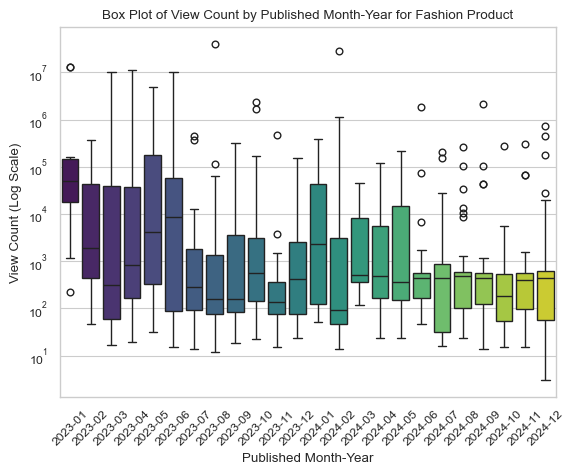

In [112]:
# Visualize the data
df_fashion_viz = df_fashion.sort_values(by="publish_month")

sns.set_theme(context="paper", style="whitegrid")
# Box plot
sns.boxplot(data=df_fashion_viz, x="publish_month", y="viewCount", hue="publish_month", palette="viridis", log_scale=True)

# Anotations
# plt.yscale('log')  # Log scale for viewCount
plt.title("Box Plot of View Count by Published Month-Year for Fashion Product")
plt.xlabel("Published Month-Year")
plt.ylabel("View Count (Log Scale)")
plt.xticks(rotation=45)  
plt.show()


In [86]:
# merge 'ytb_search_results_food.csv' and 'ytb_search_results_food_product.csv',

df_food = pd.read_csv("ytb_search_results_food.csv")
df_food = add_cols_search_results(df_food)

# write to csv
df_food.to_csv("ytb_search_results_food_v1.csv", index=False)


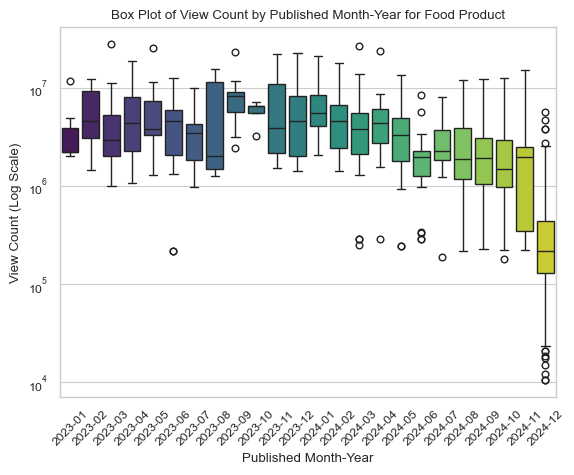

In [87]:
# Visualize the data
df_food_viz = df_food.sort_values(by="publish_month")

sns.set_theme(context="paper", style="whitegrid")
# Box plot
sns.boxplot(data=df_food_viz, x="publish_month", y="viewCount", hue="publish_month", palette="viridis", log_scale=True)

# Anotations
plt.title("Box Plot of View Count by Published Month-Year for Food Product")
plt.xlabel("Published Month-Year")
plt.ylabel("View Count (Log Scale)")
plt.xticks(rotation=45)  
plt.show()


In [97]:
df_automobile = pd.read_csv("ytb_search_results_automobile.csv")
df_automobile = add_cols_search_results(df_automobile)

df_automobile.to_csv("ytb_search_results_automobile_v1.csv", index=False)

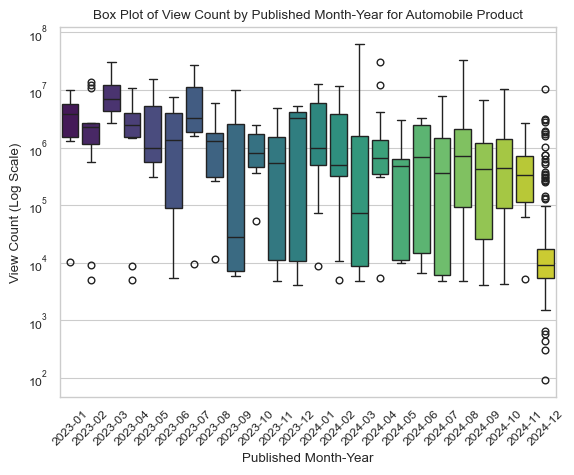

In [98]:
# Visualize the data
df_automobile_viz = df_automobile.sort_values(by="publish_month")

sns.set_theme(context="paper", style="whitegrid")
# Box plot
sns.boxplot(data=df_automobile_viz, x="publish_month", y="viewCount", hue="publish_month", palette="viridis", log_scale=True)

# Anotations
plt.title("Box Plot of View Count by Published Month-Year for Automobile Product")
plt.xlabel("Published Month-Year")
plt.ylabel("View Count (Log Scale)")
plt.xticks(rotation=45)  
plt.show()


In [99]:
df_tech = pd.read_csv("ytb_search_results_Tech Product.csv")
df_tech = add_cols_search_results(df_tech)

df_tech.to_csv("ytb_search_results_tech_v1.csv", index=False)

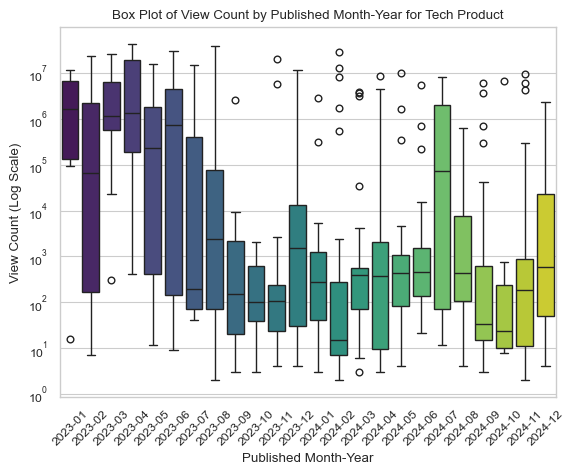

In [100]:
# Visualize the data
df_tech_viz = df_tech.sort_values(by="publish_month")

sns.set_theme(context="paper", style="whitegrid")    
# Box plot
sns.boxplot(data=df_tech_viz, x="publish_month", y="viewCount", hue="publish_month", palette="viridis", log_scale=True)

# Anotations
plt.title("Box Plot of View Count by Published Month-Year for Tech Product")
plt.xlabel("Published Month-Year")
plt.ylabel("View Count (Log Scale)")
plt.xticks(rotation=45)  
plt.show()


In [101]:
df_beauty = pd.read_csv("ytb_search_results_Beauty Product.csv")
df_beauty = add_cols_search_results(df_beauty)

df_beauty.to_csv("ytb_search_results_beauty_v1.csv", index=False)


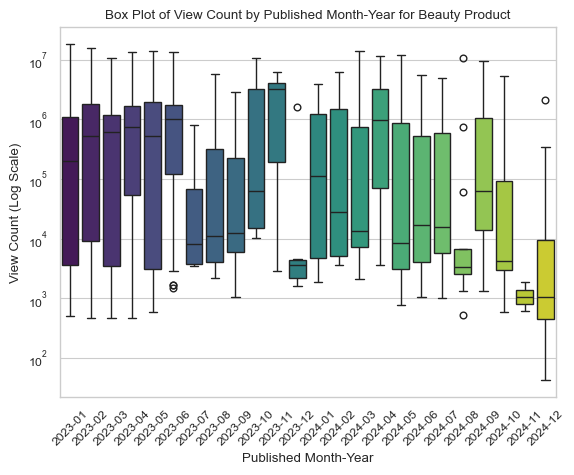

In [102]:
# Visualize the data
df_beauty_viz = df_beauty.sort_values(by="publish_month")

sns.set_theme(context="paper", style="whitegrid")
# Box plot
sns.boxplot(data=df_beauty_viz, x="publish_month", y="viewCount", hue="publish_month", palette="viridis", log_scale=True)

# Anotations
plt.title("Box Plot of View Count by Published Month-Year for Beauty Product")
plt.xlabel("Published Month-Year")
plt.ylabel("View Count (Log Scale)")
plt.xticks(rotation=45)  
plt.show()


In [103]:
df_entertainment = pd.read_csv("ytb_search_results_entertainment_product.csv")
df_entertainment = add_cols_search_results(df_entertainment)

df_entertainment.to_csv("ytb_search_results_entertainment_v1.csv", index=False)

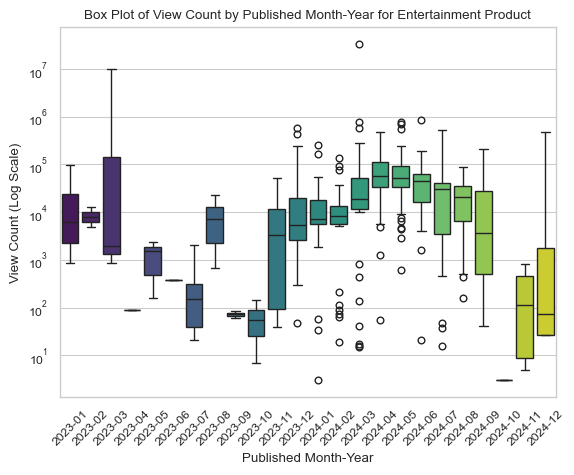

In [104]:
# Visualize the data
df_entertainment_viz = df_entertainment.sort_values(by="publish_month")

sns.set_theme(context="paper", style="whitegrid")
# Box plot
sns.boxplot(data=df_entertainment_viz, x="publish_month", y="viewCount", hue="publish_month", palette="viridis", log_scale=True)

# Anotations
plt.title("Box Plot of View Count by Published Month-Year for Entertainment Product")
plt.xlabel("Published Month-Year")
plt.ylabel("View Count (Log Scale)")
plt.xticks(rotation=45)  
plt.show()


In [105]:
df_home = pd.read_csv("ytb_search_results_home_item.csv")
df_home = add_cols_search_results(df_home)

df_home.to_csv("ytb_search_results_home_v1.csv", index=False)

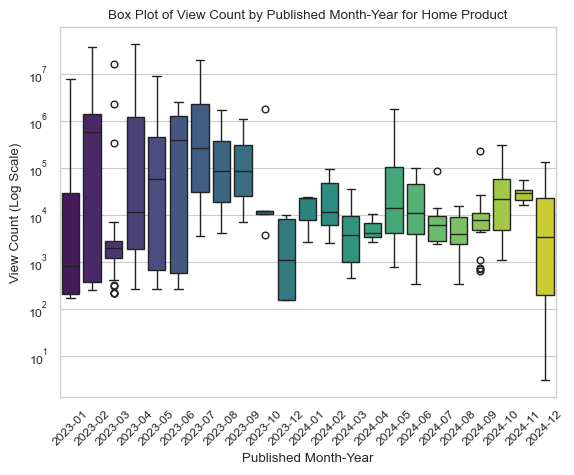

In [106]:
# Visualize the data
df_home_viz = df_home.sort_values(by="publish_month")

sns.set_theme(context="paper", style="whitegrid")
# Box plot
sns.boxplot(data=df_home_viz, x="publish_month", y="viewCount", hue="publish_month", palette="viridis", log_scale=True)

# Anotations
plt.title("Box Plot of View Count by Published Month-Year for Home Product")
plt.xlabel("Published Month-Year")
plt.ylabel("View Count (Log Scale)")
plt.xticks(rotation=45)  
plt.show()


In [107]:
df_health = pd.read_csv("ytb_search_results_health_product.csv")
df_health = add_cols_search_results(df_health)

df_health.to_csv("ytb_search_results_health_v1.csv", index=False)

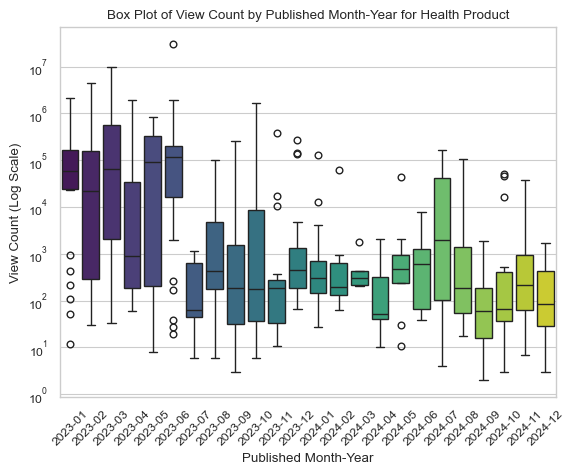

In [108]:
# Visualize the data
df_health_viz = df_health.sort_values(by="publish_month")

sns.set_theme(context="paper", style="whitegrid")
# Box plot   
sns.boxplot(data=df_health_viz, x="publish_month", y="viewCount", hue="publish_month", palette="viridis", log_scale=True)

# Anotations
plt.title("Box Plot of View Count by Published Month-Year for Health Product")
plt.xlabel("Published Month-Year")
plt.ylabel("View Count (Log Scale)")
plt.xticks(rotation=45)  
plt.show()

In [109]:
df_wellness = pd.read_csv("ytb_search_results_wellness_product.csv")
df_wellness = add_cols_search_results(df_wellness)

df_wellness.to_csv("ytb_search_results_wellness_v1.csv", index=False)

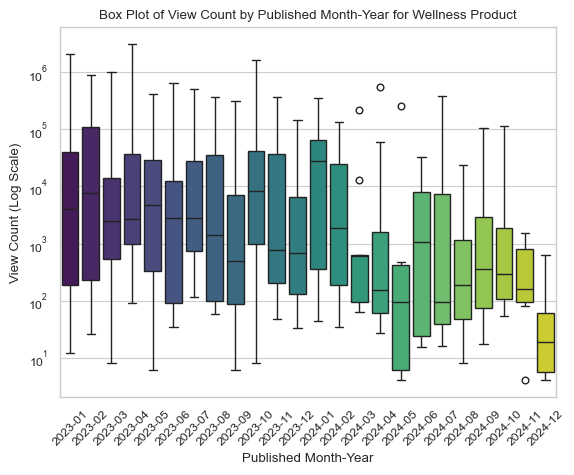

In [110]:
# Visualize the data
df_wellness_viz = df_wellness.sort_values(by="publish_month")

sns.set_theme(context="paper", style="whitegrid")
# Box plot
sns.boxplot(data=df_wellness_viz, x="publish_month", y="viewCount", hue="publish_month", palette="viridis", log_scale=True)

# Anotations
plt.title("Box Plot of View Count by Published Month-Year for Wellness Product")
plt.xlabel("Published Month-Year")
plt.ylabel("View Count (Log Scale)")
plt.xticks(rotation=45)  
plt.show()

# D. Finish text scraping

In [13]:
import glob
import pandas as pd

all_files = glob.glob("./output_dataset_2(final_list)/*.xlsx")
all_files

['./output_dataset_2(final_list)\\dataset_31_ytb_search_results_beauty.xlsx',
 './output_dataset_2(final_list)\\dataset_31_ytb_search_results_fashion.xlsx',
 './output_dataset_2(final_list)\\dataset_31_ytb_search_results_tech.xlsx']

In [25]:
#beauty_df_50 = pd.read_excel(all_files[0])
#beauty_df_50 = beauty_df_50[:51]
beauty_df_full = pd.read_csv('dataset_2_ytb_search_results_beauty.csv')
#fashion_df_50 = pd.read_excel(all_files[1])
#fashion_df_50 = fashion_df_50[:51]
fashion_df_full = pd.read_csv('dataset_2_ytb_search_results_fashion.csv')
#tech_df_50 = pd.read_excel(all_files[2])
#tech_df_50 = tech_df_50[:51]
tech_df_full = pd.read_csv('dataset_2_ytb_search_results_tech.csv')

In [ ]:
beauty_df_100_trans = beauty_df_200_trans[:100]
tech_df_100_trans = tech_df_200_trans[:100]
fashion_df_100_trans = fashion_df_200_trans[:100]

In [29]:

beauty_df_full_50 = beauty_df_full[beauty_df_full['video_url'].isin(beauty_df_100_trans['video_url'])]
beauty_df_full_50 = beauty_df_full_50.drop_duplicates().reset_index(drop=True)
fashion_df_full_50 = fashion_df_full[fashion_df_full['video_url'].isin(fashion_df_100_trans['video_url'])]
fashion_df_full_50 = fashion_df_full_50.drop_duplicates().reset_index(drop=True)
tech_df_full_50 = tech_df_full[tech_df_full['video_url'].isin(tech_df_100_trans['video_url'])]
tech_df_full_50 = tech_df_full_50.drop_duplicates().reset_index(drop=True)
len(beauty_df_full_50), len(fashion_df_full_50), len(tech_df_full_50)

(100, 100, 100)

In [38]:
# append channel stats to the data
beauty_channel_stats = []
for video_id in beauty_df_full_50['video_channel_id']:
    channel_stats = get_channel_stats(video_id)
    beauty_channel_stats.append(channel_stats)
beauty_channel_stats_df = pd.DataFrame(beauty_channel_stats)
# append the channel stats data to the existing DataFrame
beauty_df_full_50 = pd.concat([beauty_df_full_50, beauty_channel_stats_df], axis=1)

fashion_channel_stats = []
for video_id in fashion_df_full_50['video_channel_id']:
    channel_stats = get_channel_stats(video_id)
    fashion_channel_stats.append(channel_stats)
fashion_channel_stats_df = pd.DataFrame(fashion_channel_stats)
# append the channel stats data to the existing DataFrame
fashion_df_full_50 = pd.concat([fashion_df_full_50, fashion_channel_stats_df], axis=1)

tech_channel_stats = []
for video_id in tech_df_full_50['video_channel_id']:
    channel_stats = get_channel_stats(video_id)
    tech_channel_stats.append(channel_stats)
tech_channel_stats_df = pd.DataFrame(tech_channel_stats)
# append the channel stats data to the existing DataFrame
tech_df_full_50 = pd.concat([tech_df_full_50, tech_channel_stats_df], axis=1)

In [39]:
# append comment stats to the data
beauty_comment_stats = []
for video_id in beauty_df_full_50['video_id']:
    comment_stats = get_comments(video_id)
    beauty_comment_stats.append(comment_stats)
beauty_comment_stats_df = pd.DataFrame(beauty_comment_stats)
# append the comment stats data to the existing DataFrame
beauty_df_full_50 = pd.concat([beauty_df_full_50, beauty_comment_stats_df], axis=1)

fashion_comment_stats = []
for video_id in fashion_df_full_50['video_id']:
    comment_stats = get_comments(video_id)
    fashion_comment_stats.append(comment_stats)
fashion_comment_stats_df = pd.DataFrame(fashion_comment_stats)
# append the comment stats data to the existing DataFrame
fashion_df_full_50 = pd.concat([fashion_df_full_50, fashion_comment_stats_df], axis=1)

tech_comment_stats = []
for video_id in tech_df_full_50['video_id']:
    comment_stats = get_comments(video_id)
    tech_comment_stats.append(comment_stats)
tech_comment_stats_df = pd.DataFrame(tech_comment_stats)
# append the comment stats data to the existing DataFrame
tech_df_full_50 = pd.concat([tech_df_full_50, tech_comment_stats_df], axis=1)

Page 1 of comments fetched for video ymM3KdVrChc
Page 2 of comments fetched for video ymM3KdVrChc
Page 1 of comments fetched for video PppMg_5Xnr8
Page 2 of comments fetched for video PppMg_5Xnr8
Page 1 of comments fetched for video 8M1eKfOEkTQ
Page 1 of comments fetched for video gKw-gvrqPxQ
Page 1 of comments fetched for video 9uJMMuZAT_Y
Page 1 of comments fetched for video kfbJ4bulK0A
Page 1 of comments fetched for video mm-35E-PpIM
Page 1 of comments fetched for video _KpdIHV9L8k
Page 1 of comments fetched for video DW9vON1DRA8
Page 1 of comments fetched for video vpl5TCjHwCU
Page 1 of comments fetched for video nTg8hrEQIvM
Page 1 of comments fetched for video EPKSJUI54gc
Page 1 of comments fetched for video fXMGZiB7M-Q
Page 1 of comments fetched for video XpEtRe-luHQ
Page 1 of comments fetched for video X6mfMOF7TZM
Page 1 of comments fetched for video tlbhwWvQGIs
Page 1 of comments fetched for video bxCJDn6uQSE
Page 1 of comments fetched for video Sb8copYtmBY
Page 1 of comments f

In [44]:
beauty_df_full_50.shape, fashion_df_full_50.shape, tech_df_full_50.shape

((100, 52), (100, 52), (100, 52))

In [62]:
# save to csv
beauty_df_full_50.to_csv("dataset_2_beauty.csv", index=False)
fashion_df_full_50.to_csv("dataset_2_fashion.csv", index=False)
tech_df_full_50.to_csv("dataset_2_tech.csv", index=False)

In [23]:
# load data from csv
import pandas as pd
beauty_df_full_50 = pd.read_csv("dataset_2_beauty.csv")
fashion_df_full_50 = pd.read_csv("dataset_2_fashion.csv")
tech_df_full_50 = pd.read_csv("dataset_2_tech.csv")

In [48]:
# load json
import json
with open(r"video_info_cache_beauty_50.json", 'r') as f:
    beauty_video_info = json.load(f)
with open(r"video_info_cache_fashion_50.json", 'r') as f:
    fashion_video_info = json.load(f)
with open(r"video_info_cache_tech_50.json", 'r') as f:
    tech_video_info = json.load(f)

In [49]:
result_list = []

for video_id in beauty_df_full_50.video_id:
    video_info = beauty_video_info.get(video_id, {})  # Safely access the video info
    append_dict = {"video_id": video_id}  # Initialize a new dictionary for each video
    
    # Process formats
    for fmt in video_info.get("formats", []):  # Safely iterate formats
        if fmt.get("format_id") == "sb0":  # Safely access format_id
            append_dict["merged_screenshot"] = fmt.get("fragments")  # Safely access fragments
    
    # Process other fields
    append_dict["video_chapters"] = video_info.get("chapters")
    append_dict["heatmap"] = video_info.get("heatmap")
    
    # Handle automatic captions safely
    captions = video_info.get("automatic_captions", {}).get("en", [])
    append_dict["automatic_captions"] = captions
    
    result_list.append(append_dict)  # Collect results
result_list_df = pd.DataFrame(result_list)  # Convert to DataFrame
# merge the two dataframes
beauty_df_full_50_final = pd.concat([beauty_df_full_50, result_list_df], axis=1)

In [50]:
result_list = []

for video_id in tech_df_full_50.video_id:
    video_info = tech_video_info.get(video_id, {})  # Safely access the video info
    append_dict = {"video_id": video_id}  # Initialize a new dictionary for each video
    
    # Process formats
    for fmt in video_info.get("formats", []):  # Safely iterate formats
        if fmt.get("format_id") == "sb0":  # Safely access format_id
            append_dict["merged_screenshot"] = fmt.get("fragments")  # Safely access fragments
    
    # Process other fields
    append_dict["video_chapters"] = video_info.get("chapters")
    append_dict["heatmap"] = video_info.get("heatmap")
    
    # Handle automatic captions safely
    captions = video_info.get("automatic_captions", {}).get("en", [])
    append_dict["automatic_captions"] = captions
    
    result_list.append(append_dict)  # Collect results
result_list_df = pd.DataFrame(result_list)  # Convert to DataFrame
# merge the two dataframes
tech_df_full_50_final = pd.concat([tech_df_full_50, result_list_df], axis=1)

In [51]:
result_list = []

for video_id in fashion_df_full_50.video_id:
    video_info = fashion_video_info.get(video_id, {})  # Safely access the video info
    append_dict = {"video_id": video_id}  # Initialize a new dictionary for each video
    
    # Process formats
    for fmt in video_info.get("formats", []):  # Safely iterate formats
        if fmt.get("format_id") == "sb0":  # Safely access format_id
            append_dict["merged_screenshot"] = fmt.get("fragments")  # Safely access fragments
    
    # Process other fields
    append_dict["video_chapters"] = video_info.get("chapters")
    append_dict["heatmap"] = video_info.get("heatmap")
    
    # Handle automatic captions safely
    captions = video_info.get("automatic_captions", {}).get("en", [])
    append_dict["automatic_captions"] = captions
    
    result_list.append(append_dict)  # Collect results
result_list_df = pd.DataFrame(result_list)  # Convert to DataFrame
# merge the two dataframes
fashion_df_full_50_final = pd.concat([fashion_df_full_50, result_list_df], axis=1)

In [66]:
fashion_df_full_50_final.columns

Index(['product_type', 'product_name', 'video_id', 'video_url', 'video_title',
       'video_description', 'video_channel', 'video_channel_id',
       'video_published', 'video_thumbnail', 'title', 'description',
       'channelTitle', 'publishTime', 'channelId', 'thumbnail', 'tags',
       'topicCategories', 'categoryId', 'liveBroadcastContent', 'duration',
       'has_caption', 'licensedContent', 'definition', 'contentRating',
       'madeForKids', 'privacyStatus', 'viewCount', 'likeCount',
       'commentCount', 'dislikeCount', 'favoriteCount', 'paidProductPlacement',
       'transcript', 'transcript_is_generated', 'duration_seconds',
       'publish_month', 'channel_title', 'channel_description',
       'channel_custom_url', 'channel_thumbnail', 'channel_published_at',
       'channel_view_count', 'channel_subscriber_count', 'channel_video_count',
       'channel_playlist_count', 'channel_comment_count', 'channel_live_count',
       'channel_topic_categories', 'channel_topic_ids', 

In [69]:
def drop_cols(df):
    # drop unnecessary columns
    df = df.drop(['product_name', 'liveBroadcastContent', 'contentRating', 'video_channel', 'title', 'video_channel_id', 'privacyStatus', 'dislikeCount', 'favoriteCount', 'channel_playlist_count', 'channel_comment_count', 'channel_live_count'], axis=1)
    # drop dumplicate columns
    df = df.loc[:,~df.columns.duplicated()]
    return df
# test for fashion_df_full_50_final
fashion_df_full_50_final_clean = drop_cols(fashion_df_full_50_final)
tech_df_full_50_final_clean = drop_cols(tech_df_full_50_final)
beauty_df_full_50_final_clean = drop_cols(beauty_df_full_50_final)

In [70]:
fashion_df_full_50_final_clean.shape, tech_df_full_50_final_clean.shape, beauty_df_full_50_final_clean.shape

((100, 44), (100, 44), (100, 44))

In [71]:
# save to csv
beauty_df_full_50_final_clean.to_csv("beauty_df_full_100_final.csv", index=False, encoding='utf-8')
tech_df_full_50_final_clean.to_csv("tech_df_full_100_final.csv", index=False, encoding='utf-8')
fashion_df_full_50_final_clean.to_csv("fashion_df_full_100_final.csv", index=False, encoding='utf-8')

In [72]:
# save to excel
beauty_df_full_50_final_clean.to_excel("beauty_df_100_final.xlsx", index=False)
tech_df_full_50_final_clean.to_excel("tech_df_100_final.xlsx", index=False)
fashion_df_full_50_final_clean.to_excel("fashion_df_100_final.xlsx", index=False)

In [45]:
import os
import json
import time
from yt_dlp import YoutubeDL

CATEGORY = 'fashion_50'

# Load or initialize video_info_cache
if os.path.exists(f"video_info_cache_{CATEGORY}.json"):
    with open(f"video_info_cache_{CATEGORY}.json", "r") as f:
        video_info_cache = json.load(f)
else:
    video_info_cache = {}

# Initialize yt-dlp
ydl_opts = {"quiet": True}
ydl = YoutubeDL(ydl_opts)

# Fetch video info
for idx, video_id in enumerate(fashion_df_full_50["video_id"]):
    if video_id in video_info_cache:
        print(f"Skipping {video_id}: Already in cache.")
        continue

    url = f"https://www.youtube.com/watch?v={video_id}"
    try:
        print(f"Fetching info for {video_id}...")
        info = ydl.extract_info(url, download=False)
        video_info_cache[video_id] = info
    except Exception as e:
        print(f"Error fetching info for {video_id}: {e}")
        continue

    # Save cache every 10 iterations
    if idx % 10 == 0:
        with open(f"video_info_cache_{CATEGORY}.json", "w") as f:
            json.dump(video_info_cache, f, indent=4)

    # Delay to avoid rate limiting
    time.sleep(1)

# Final save
with open(f"video_info_cache_{CATEGORY}.json", "w") as f:
    json.dump(video_info_cache, f, indent=4)

print("Metadata fetching complete.")


Skipping at9hcz9qDQY: Already in cache.
Skipping mxjDuQ6ECx8: Already in cache.
Skipping JHVzTOkfTa4: Already in cache.
Skipping H2LMLO50nTA: Already in cache.
Skipping P7CSYXitNkM: Already in cache.
Skipping HbJL0RHJ0_w: Already in cache.
Skipping mfIzJCpWAIU: Already in cache.
Skipping 3IMctLi320E: Already in cache.
Skipping sNZYR0gl7zo: Already in cache.
Skipping cZgCk-b8DLI: Already in cache.
Skipping q0RvRYI70UQ: Already in cache.
Skipping FvgBwEYkdCw: Already in cache.
Skipping gCX-SiBFJ0I: Already in cache.
Skipping 0cOSNHNjAmM: Already in cache.
Skipping 2Ji7P37kGzg: Already in cache.
Skipping Zuqq0v-scMw: Already in cache.
Skipping tzIx2G7jzoY: Already in cache.
Skipping AA3YmHCL2oE: Already in cache.
Skipping tjN9ERszaKk: Already in cache.
Skipping LfzRabBfNCg: Already in cache.
Skipping Y6t3lx36StE: Already in cache.
Skipping IQD75dB1zZk: Already in cache.
Skipping baPThLG1VFc: Already in cache.
Skipping axCHoIsR63M: Already in cache.
Skipping kKGLXTByViU: Already in cache.


In [46]:
import os
import json
import time
from yt_dlp import YoutubeDL

CATEGORY = 'tech_50'

# Load or initialize video_info_cache
if os.path.exists(f"video_info_cache_{CATEGORY}.json"):
    with open(f"video_info_cache_{CATEGORY}.json", "r") as f:
        video_info_cache = json.load(f)
else:
    video_info_cache = {}

# Initialize yt-dlp
ydl_opts = {"quiet": True}
ydl = YoutubeDL(ydl_opts)

# Fetch video info
for idx, video_id in enumerate(tech_df_full_50["video_id"]):
    if video_id in video_info_cache:
        print(f"Skipping {video_id}: Already in cache.")
        continue

    url = f"https://www.youtube.com/watch?v={video_id}"
    try:
        print(f"Fetching info for {video_id}...")
        info = ydl.extract_info(url, download=False)
        video_info_cache[video_id] = info
    except Exception as e:
        print(f"Error fetching info for {video_id}: {e}")
        continue

    # Save cache every 10 iterations
    if idx % 10 == 0:
        with open(f"video_info_cache_{CATEGORY}.json", "w") as f:
            json.dump(video_info_cache, f, indent=4)

    # Delay to avoid rate limiting
    time.sleep(1)

# Final save
with open(f"video_info_cache_{CATEGORY}.json", "w") as f:
    json.dump(video_info_cache, f, indent=4)

print("Metadata fetching complete.")


Skipping 9HQx5pgUoiY: Already in cache.
Skipping b4x8boB2KdI: Already in cache.
Skipping etP2Th9g2hM: Already in cache.
Fetching info for -StTTWAw214...
Skipping Sc9WByMKTG4: Already in cache.
Skipping hJZ63aCXFFc: Already in cache.
Skipping 5BhJvMOeQWo: Already in cache.
Skipping 9PCtfKr5Uw8: Already in cache.
Skipping LRRpyTlsZ-s: Already in cache.
Skipping d2kSQiYrOeQ: Already in cache.
Skipping 5ee2cMal4oI: Already in cache.
Skipping gKOzx4FHObU: Already in cache.
Skipping SdJvoHrvqlA: Already in cache.
Skipping Q451suhTHp8: Already in cache.
Skipping y2vJuxw8-dI: Already in cache.
Skipping ehjpS8Bnd20: Already in cache.
Skipping VcAxjw3akMU: Already in cache.
Skipping julah2zp4dY: Already in cache.
Skipping Jj4wbjBoz9I: Already in cache.
Skipping sm5a9WjNP3g: Already in cache.
Skipping HnIuy3qI4Sg: Already in cache.
Skipping MU1uEbqodJE: Already in cache.
Skipping L_xZVXlbNOw: Already in cache.
Skipping ZhmBG67nSDM: Already in cache.
Skipping I8hPTEfcZjM: Already in cache.
Skippin

In [47]:
import os
import json
import time
from yt_dlp import YoutubeDL

CATEGORY = 'fashion_50'

# Load or initialize video_info_cache
if os.path.exists(f"video_info_cache_{CATEGORY}.json"):
    with open(f"video_info_cache_{CATEGORY}.json", "r") as f:
        video_info_cache = json.load(f)
else:
    video_info_cache = {}

# Initialize yt-dlp
ydl_opts = {"quiet": True}
ydl = YoutubeDL(ydl_opts)

# Fetch video info
for idx, video_id in enumerate(fashion_df_full_50["video_id"]):
    if video_id in video_info_cache:
        print(f"Skipping {video_id}: Already in cache.")
        continue

    url = f"https://www.youtube.com/watch?v={video_id}"
    try:
        print(f"Fetching info for {video_id}...")
        info = ydl.extract_info(url, download=False)
        video_info_cache[video_id] = info
    except Exception as e:
        print(f"Error fetching info for {video_id}: {e}")
        continue

    # Save cache every 10 iterations
    if idx % 10 == 0:
        with open(f"video_info_cache_{CATEGORY}.json", "w") as f:
            json.dump(video_info_cache, f, indent=4)

    # Delay to avoid rate limiting
    time.sleep(1)

# Final save
with open(f"video_info_cache_{CATEGORY}.json", "w") as f:
    json.dump(video_info_cache, f, indent=4)

print("Metadata fetching complete.")


Skipping at9hcz9qDQY: Already in cache.
Skipping mxjDuQ6ECx8: Already in cache.
Skipping JHVzTOkfTa4: Already in cache.
Skipping H2LMLO50nTA: Already in cache.
Skipping P7CSYXitNkM: Already in cache.
Skipping HbJL0RHJ0_w: Already in cache.
Skipping mfIzJCpWAIU: Already in cache.
Skipping 3IMctLi320E: Already in cache.
Skipping sNZYR0gl7zo: Already in cache.
Skipping cZgCk-b8DLI: Already in cache.
Skipping q0RvRYI70UQ: Already in cache.
Skipping FvgBwEYkdCw: Already in cache.
Skipping gCX-SiBFJ0I: Already in cache.
Skipping 0cOSNHNjAmM: Already in cache.
Skipping 2Ji7P37kGzg: Already in cache.
Skipping Zuqq0v-scMw: Already in cache.
Skipping tzIx2G7jzoY: Already in cache.
Skipping AA3YmHCL2oE: Already in cache.
Skipping tjN9ERszaKk: Already in cache.
Skipping LfzRabBfNCg: Already in cache.
Skipping Y6t3lx36StE: Already in cache.
Skipping IQD75dB1zZk: Already in cache.
Skipping baPThLG1VFc: Already in cache.
Skipping axCHoIsR63M: Already in cache.
Skipping kKGLXTByViU: Already in cache.


In [2]:
import pandas as pd
beauty_df_full_50_final = pd.read_csv("beauty_df_full_50_final.csv")

In [3]:
# save as excel
beauty_df_full_50_final.to_excel("beauty_df_full_50_final.xlsx", index=False)

In [5]:
beauty_df_200 = pd.read_excel("dataset_41_ytb_search_results_beauty.xlsx")
tech_df_200 = pd.read_excel("dataset_43_ytb_search_results_tech.xlsx")
fashion_df_200 = pd.read_excel("output_dataset_2(final_list)\dataset_31_ytb_search_results_fashion.xlsx")


<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\giahu\AppData\Local\Temp\ipykernel_25112\2791473579.py:3: SyntaxWarning: invalid escape sequence '\d'
  fashion_df_200 = pd.read_excel("output_dataset_2(final_list)\dataset_31_ytb_search_results_fashion.xlsx")


In [6]:
beauty_df_200.columns

Index(['product_type', 'product_name', 'video_id', 'video_url', 'video_title',
       'video_description', 'video_channel', 'video_channel_id',
       'video_published', 'video_thumbnail', 'title', 'description',
       'channelTitle', 'publishTime', 'channelId', 'thumbnail', 'tags',
       'topicCategories', 'categoryId', 'liveBroadcastContent', 'duration',
       'has_caption', 'licensedContent', 'definition', 'contentRating',
       'madeForKids', 'privacyStatus', 'viewCount', 'likeCount',
       'commentCount', 'dislikeCount', 'favoriteCount', 'paidProductPlacement',
       'transcript', 'transcript_is_generated', 'duration_seconds',
       'publish_month'],
      dtype='object')

In [20]:
beauty_df_200_trans = beauty_df_200[pd.notnull(beauty_df_200['transcript_is_generated'])]
tech_df_200_trans = tech_df_200[pd.notnull(tech_df_200['transcript_is_generated'])]
fashion_df_200_trans = fashion_df_200[pd.notnull(fashion_df_200['transcript_is_generated'])]
beauty_df_200_trans.shape, tech_df_200_trans.shape, fashion_df_200_trans.shape

((116, 37), (169, 37), (240, 37))

# E. Get images

In [1]:
# read in the json files
import pandas as pd
beauty_df_100 = pd.read_csv("output/beauty_df_full_100_final.csv", encoding='utf-8')
tech_df_100 = pd.read_csv("output/tech_df_full_100_final.csv", encoding='utf-8')
fashion_df_100 = pd.read_csv("output/fashion_df_full_100_final.csv", encoding='utf-8')

In [2]:
test_ss = beauty_df_100.iloc[0]['merged_screenshot']
test_ss

"[{'url': 'https://i.ytimg.com/sb/ymM3KdVrChc/storyboard3_L3/M0.jpg?sqp=-oaymwENSDfyq4qpAwVwAcABBqLzl_8DBgi34o2pBg==&sigh=rs$AOn4CLDYcVPro643JWNV_52HIgCLAWEK2A', 'duration': 44.40659340659341}, {'url': 'https://i.ytimg.com/sb/ymM3KdVrChc/storyboard3_L3/M1.jpg?sqp=-oaymwENSDfyq4qpAwVwAcABBqLzl_8DBgi34o2pBg==&sigh=rs$AOn4CLDYcVPro643JWNV_52HIgCLAWEK2A', 'duration': 44.40659340659341}, {'url': 'https://i.ytimg.com/sb/ymM3KdVrChc/storyboard3_L3/M2.jpg?sqp=-oaymwENSDfyq4qpAwVwAcABBqLzl_8DBgi34o2pBg==&sigh=rs$AOn4CLDYcVPro643JWNV_52HIgCLAWEK2A', 'duration': 44.40659340659341}, {'url': 'https://i.ytimg.com/sb/ymM3KdVrChc/storyboard3_L3/M3.jpg?sqp=-oaymwENSDfyq4qpAwVwAcABBqLzl_8DBgi34o2pBg==&sigh=rs$AOn4CLDYcVPro643JWNV_52HIgCLAWEK2A', 'duration': 44.40659340659341}, {'url': 'https://i.ytimg.com/sb/ymM3KdVrChc/storyboard3_L3/M4.jpg?sqp=-oaymwENSDfyq4qpAwVwAcABBqLzl_8DBgi34o2pBg==&sigh=rs$AOn4CLDYcVPro643JWNV_52HIgCLAWEK2A', 'duration': 44.40659340659341}, {'url': 'https://i.ytimg.com/sb/ymM3Kd

In [3]:
import json
import ast

def process_json(json_string):
    try:
        python_dict = ast.literal_eval(json_string) # Safely evaluates to Python dict
        json_string = json.dumps(python_dict) #Converts to proper JSON string
        data = json.loads(json_string)
        return data
    except (ValueError, SyntaxError, json.JSONDecodeError) as e:
        print(f"Error processing JSON: {e}")
        return None

img_dict_tech = {}
for idx, row in tech_df_100.iterrows():
    if pd.notnull(row['merged_screenshot']):
        img_dict_tech[row['video_id']] = process_json(row['merged_screenshot'])
img_dict_tech

{'9HQx5pgUoiY': [{'url': 'https://i.ytimg.com/sb/9HQx5pgUoiY/storyboard3_L1/M0.jpg?sqp=-oaymwENSDfyq4qpAwVwAcABBqLzl_8DBgiPlO65Bg==&sigh=rs$AOn4CLBTi5HapljSrh_4x-IUJKeS5k05gQ',
   'duration': 494.07894736842104},
  {'url': 'https://i.ytimg.com/sb/9HQx5pgUoiY/storyboard3_L1/M1.jpg?sqp=-oaymwENSDfyq4qpAwVwAcABBqLzl_8DBgiPlO65Bg==&sigh=rs$AOn4CLBTi5HapljSrh_4x-IUJKeS5k05gQ',
   'duration': 256.92105263157896}],
 'b4x8boB2KdI': [{'url': 'https://i.ytimg.com/sb/b4x8boB2KdI/storyboard3_L3/M0.jpg?sqp=-oaymwENSDfyq4qpAwVwAcABBqLzl_8DBgitqbO5Bg==&sigh=rs$AOn4CLABTZalV72pwOtVt92v8LarD9L8-A',
   'duration': 43.90540540540541},
  {'url': 'https://i.ytimg.com/sb/b4x8boB2KdI/storyboard3_L3/M1.jpg?sqp=-oaymwENSDfyq4qpAwVwAcABBqLzl_8DBgitqbO5Bg==&sigh=rs$AOn4CLABTZalV72pwOtVt92v8LarD9L8-A',
   'duration': 43.90540540540541},
  {'url': 'https://i.ytimg.com/sb/b4x8boB2KdI/storyboard3_L3/M2.jpg?sqp=-oaymwENSDfyq4qpAwVwAcABBqLzl_8DBgitqbO5Bg==&sigh=rs$AOn4CLABTZalV72pwOtVt92v8LarD9L8-A',
   'duration': 43

In [4]:
len(img_dict_tech)

100

In [18]:
data[0]['url']

'https://i.ytimg.com/sb/ymM3KdVrChc/storyboard3_L3/M0.jpg?sqp=-oaymwENSDfyq4qpAwVwAcABBqLzl_8DBgi34o2pBg==&sigh=rs$AOn4CLDYcVPro643JWNV_52HIgCLAWEK2A'

In [5]:
import requests
import os
from io import BytesIO
from PIL import Image

def save_images_from_urls(image_dict, output_dir="images"):
    """
    Downloads images from a list of URLs and saves them locally.

    Args:
        image_urls: A list of image URLs.
        output_dir: The directory to save the images (created if it doesn't exist).
    """

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    for video_id in image_dict:
        image_urls = [img['url'] for img in image_dict[video_id]]
        for i, url in enumerate(image_urls):
            try:
                response = requests.get(url, stream=True)
                response.raise_for_status()  # Raise an exception for bad status codes (4xx or 5xx)

                image = Image.open(BytesIO(response.content))
                filename = os.path.join(output_dir, f"{video_id}_{i+1}.jpg")  #Safe filename creation
                image.save(filename)
                print(f"Image {i+1} saved to: {filename}")

            except requests.exceptions.RequestException as e:
                print(f"Error downloading image {i+1} from {url}: {e}")
            except IOError as e:
                print(f"Error saving image {i+1} from {url}: {e}")
            except Exception as e: #Catch any other unexpected error
                print(f"An unexpected error occurred for image {i+1} from {url}: {e}")


# Example Usage (replace with your actual data)
save_images_from_urls(img_dict_tech)


Image 1 saved to: images\9HQx5pgUoiY_1.jpg
Image 2 saved to: images\9HQx5pgUoiY_2.jpg
Image 1 saved to: images\b4x8boB2KdI_1.jpg
Image 2 saved to: images\b4x8boB2KdI_2.jpg
Image 3 saved to: images\b4x8boB2KdI_3.jpg
Image 4 saved to: images\b4x8boB2KdI_4.jpg
Image 5 saved to: images\b4x8boB2KdI_5.jpg
Image 6 saved to: images\b4x8boB2KdI_6.jpg
Image 7 saved to: images\b4x8boB2KdI_7.jpg
Image 8 saved to: images\b4x8boB2KdI_8.jpg
Image 9 saved to: images\b4x8boB2KdI_9.jpg
Image 1 saved to: images\etP2Th9g2hM_1.jpg
Image 2 saved to: images\etP2Th9g2hM_2.jpg
Image 3 saved to: images\etP2Th9g2hM_3.jpg
Image 4 saved to: images\etP2Th9g2hM_4.jpg
Image 5 saved to: images\etP2Th9g2hM_5.jpg
Image 6 saved to: images\etP2Th9g2hM_6.jpg
Image 7 saved to: images\etP2Th9g2hM_7.jpg
Image 8 saved to: images\etP2Th9g2hM_8.jpg
Image 9 saved to: images\etP2Th9g2hM_9.jpg
Image 10 saved to: images\etP2Th9g2hM_10.jpg
Image 11 saved to: images\etP2Th9g2hM_11.jpg
Image 12 saved to: images\etP2Th9g2hM_12.jpg
Image

# Experimental (For testing purpose only, please use the code above for proper functioning)

In [26]:
import undetected_chromedriver as uc
from selenium import webdriver
import time
import os
from urllib.parse import urlparse, parse_qs
#from settings import *

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--log-level=3")
chrome_options.add_argument("--disable-infobars")
chrome_options.add_argument("--disable-extensions")
chrome_options.add_argument("--disable-popup-blocking")
# chrome_options.add_argument('--headless')
driver = uc.Chrome(options=chrome_options)

driver.get("https://www.youtube.com/watch?v=" + video_ids[0])

In [32]:
def getcomments(video):
  request = youtube.commentThreads().list(
      part="snippet",
      videoId=video,
      maxResults=100
  )

  comments = []

  # Execute the request.
  response = request.execute()

  # Get the comments from the response.
  for item in response['items']:
      comment = item['snippet']['topLevelComment']['snippet']
      public = item['snippet']['isPublic']
      comments.append([
          comment['authorDisplayName'],
          comment['publishedAt'],
          comment['likeCount'],
          comment['textOriginal'],
          comment['videoId'],
          public
      ])

  for i in range(3):
    try:
     nextPageToken = response['nextPageToken']
    except KeyError:
     break
    nextPageToken = response['nextPageToken']
    # Create a new request object with the next page token.
    nextRequest = youtube.commentThreads().list(part="snippet", videoId=video, maxResults=100, pageToken=nextPageToken)
    # Execute the next request.
    response = nextRequest.execute()
    # Get the comments from the next response.
    for item in response['items']:
      comment = item['snippet']['topLevelComment']['snippet']
      public = item['snippet']['isPublic']
      comments.append([
          comment['authorDisplayName'],
          comment['publishedAt'],
          comment['likeCount'],
          comment['textOriginal'],
          comment['videoId'],
          public
      ])

  df2 = pd.DataFrame(comments, columns=['author', 'updated_at', 'like_count', 'text','video_id','public'])
  return df2


## Video IDs from Playlist

In [ ]:
def get_all_video_ids_from_playlists(youtube, playlist_ids):
    all_videos = []  # Initialize a single list to hold all video IDs

    for playlist_id in playlist_ids:
        next_page_token = None

        # Fetch videos from the current playlist
        while True:
            playlist_request = youtube.playlistItems().list(
                part='contentDetails',
                playlistId=playlist_id,
                maxResults=50,
                pageToken=next_page_token)
            playlist_response = playlist_request.execute()

            all_videos += [item['contentDetails']['videoId'] for item in playlist_response['items']]

            next_page_token = playlist_response.get('nextPageToken')

            if next_page_token is None:
                break

    return all_videos

# Fetch all video IDs from the specified playlists
video_ids = get_all_video_ids_from_playlists(youtube, playlist_ids)

# Now you can pass video_ids to the next function
# next_function(video_ids)

In [ ]:
# Function to get replies for a specific comment
def get_replies(youtube, parent_id, video_id):  # Added video_id as an argument
    replies = []
    next_page_token = None

    while True:
        reply_request = youtube.comments().list(
            part="snippet",
            parentId=parent_id,
            textFormat="plainText",
            maxResults=100,
            pageToken=next_page_token
        )
        reply_response = reply_request.execute()

        for item in reply_response['items']:
            comment = item['snippet']
            replies.append({
                'Timestamp': comment['publishedAt'],
                'Username': comment['authorDisplayName'],
                'VideoID': video_id,
                'Comment': comment['textDisplay'],
                'Date': comment['updatedAt'] if 'updatedAt' in comment else comment['publishedAt']
            })

        next_page_token = reply_response.get('nextPageToken')
        if not next_page_token:
            break

    return replies

# Function to get all comments (including replies) for a single video
def get_comments_for_video(youtube, video_id):
    all_comments = []
    next_page_token = None

    while True:
        comment_request = youtube.commentThreads().list(
            part="snippet",
            videoId=video_id,
            pageToken=next_page_token,
            textFormat="plainText",
            maxResults=100
        )
        comment_response = comment_request.execute()

        for item in comment_response['items']:
            top_comment = item['snippet']['topLevelComment']['snippet']
            all_comments.append({
                'Timestamp': top_comment['publishedAt'],
                'Username': top_comment['authorDisplayName'],
                'VideoID': video_id,  # Directly using video_id from function parameter
                'Comment': top_comment['textDisplay'],
                'Date': top_comment['updatedAt'] if 'updatedAt' in top_comment else top_comment['publishedAt']
            })

            # Fetch replies if there are any
            if item['snippet']['totalReplyCount'] > 0:
                all_comments.extend(get_replies(youtube, item['snippet']['topLevelComment']['id'], video_id))

        next_page_token = comment_response.get('nextPageToken')
        if not next_page_token:
            break

    return all_comments

# List to hold all comments from all videos
all_comments = []


for video_id in video_ids:
    video_comments = get_comments_for_video(youtube, video_id)
    all_comments.extend(video_comments)

# Create DataFrame
comments_df = pd.DataFrame(all_comments)

In [ ]:
#Extract youtube video frame
import os
from functools import partial
from multiprocessing.pool import Pool

import cv2
import youtube_dl

def process_video_parallel(url, skip_frames, process_number):
    cap = cv2.VideoCapture(url)
    num_processes = os.cpu_count()
    frames_per_process = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) // num_processes
    cap.set(cv2.CAP_PROP_POS_FRAMES, frames_per_process * process_number)
    x = 0
    count = 0
    while x < 10 and count < frames_per_process:
        ret, frame = cap.read()
        if not ret:
            break
        filename =r"PATH\shot"+str(x)+".png"
        x += 1
        cv2.imwrite(filename.format(count), frame)
        count += skip_frames  # Skip 300 frames i.e. 10 seconds for 30 fps
        cap.set(1, count)
    cap.release()



video_url = "..."  # The Youtube URL
ydl_opts = {}
ydl = youtube_dl.YoutubeDL(ydl_opts)
info_dict = ydl.extract_info(video_url, download=False)

formats = info_dict.get('formats', None)

print("Obtaining frames")
for f in formats:
    if f.get('format_note', None) == '144p':
        url = f.get('url', None)
        cpu_count = os.cpu_count()
        with Pool(cpu_count) as pool:
            pool.map(partial(process_video_parallel, url, 300), range(cpu_count))

In [17]:
%pip install yt_dlp

   ---------------------------------------- 0.0/3.2 MB ? eta -:--:--
   ---------------------------------------- 3.2/3.2 MB 26.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [31]:
import os
import json
import time
from yt_dlp import YoutubeDL

CATEGORY = product_type_file

# Load video_stats_cache
if os.path.exists(f"video_stats_cache_{CATEGORY}.json"):
    with open(f"video_stats_cache_{CATEGORY}.json", "r") as f:
        video_stats_cache = json.load(f)
else:
    print("video_stats_cache_tech.json not found.")
    video_stats_cache = {}

# Load or initialize video_info_cache
if os.path.exists(f"video_info_cache_{CATEGORY}.json"):
    with open(f"video_info_cache_{CATEGORY}.json", "r") as f:
        video_info_cache = json.load(f)
else:
    video_info_cache = {}

# Initialize yt-dlp
ydl_opts = {"quiet": True}
ydl = YoutubeDL(ydl_opts)

# Fetch video info
for idx, video_id in enumerate(video_stats_cache.keys()):
    if video_id in video_info_cache:
        print(f"Skipping {video_id}: Already in cache.")
        continue

    url = f"https://www.youtube.com/watch?v={video_id}"
    try:
        print(f"Fetching info for {video_id}...")
        info = ydl.extract_info(url, download=False)
        video_info_cache[video_id] = info
    except Exception as e:
        print(f"Error fetching info for {video_id}: {e}")
        continue

    # Save cache every 10 iterations
    if idx % 10 == 0:
        with open(f"video_info_cache_{CATEGORY}.json", "w") as f:
            json.dump(video_info_cache, f, indent=4)

    # Delay to avoid rate limiting
    time.sleep(1)

# Final save
with open(f"video_info_cache_{CATEGORY}.json", "w") as f:
    json.dump(video_info_cache, f, indent=4)

print("Metadata fetching complete.")


Fetching info for RysBS-aYWIU...
Fetching info for XeML16BwHnw...
Fetching info for ktw4wp69j6A...
Fetching info for oOWj6-Wu7_4...
Fetching info for SenJZyRY71s...
Fetching info for wgjjBlBdrQQ...
Fetching info for z_oGUsZczGk...
Fetching info for WKjj-NRGW6U...
Fetching info for xN3JQ04o5vI...
Fetching info for S4VimMxwvwY...
Fetching info for 1l7TpFvPT8o...
Fetching info for HoqSW_F-NC0...
Fetching info for YEnPco3Y_10...
Fetching info for HHTsy0y1GQg...
Fetching info for TWEzjcN8Xp0...
Fetching info for D9IKAR0wL3A...
Fetching info for AE9Mlb0e3z4...
Fetching info for AKvO9X3EsSg...
Fetching info for -Z_yLNYNzm8...
Fetching info for uRj12oNOyWQ...
Fetching info for fvb_tiBYKKw...
Fetching info for slBPZ2fndcA...
Fetching info for uePS0YU4eWU...
Fetching info for Lc1mF8c-ML4...
Fetching info for BP9K5W8uvSo...
Fetching info for MAKzEQQlmM8...
Fetching info for mHpL0IezXZY...
Fetching info for l2ByDz7rvUk...
Fetching info for pN-fV4ujvzc...
Fetching info for nE-ipBJ7tUY...
Fetching i

ERROR: [youtube] baW0WWqoXXE: Video unavailable. This content isn't available, try again later.


Error fetching info for baW0WWqoXXE: ERROR: [youtube] baW0WWqoXXE: Video unavailable. This content isn't available, try again later.
Fetching info for 6KhMn7Jy2Ys...


ERROR: [youtube] 6KhMn7Jy2Ys: Video unavailable. This content isn't available, try again later.


Error fetching info for 6KhMn7Jy2Ys: ERROR: [youtube] 6KhMn7Jy2Ys: Video unavailable. This content isn't available, try again later.
Fetching info for jSJ-4vdhpDE...


ERROR: [youtube] jSJ-4vdhpDE: Video unavailable. This content isn't available, try again later.


Error fetching info for jSJ-4vdhpDE: ERROR: [youtube] jSJ-4vdhpDE: Video unavailable. This content isn't available, try again later.
Fetching info for q3d2wQzubP4...
Fetching info for ed2AzAa6r58...
Fetching info for 1D7MedFAYOI...
Fetching info for hILAQ5XJ0P0...


ERROR: [youtube] hILAQ5XJ0P0: Video unavailable. This content isn't available, try again later.


Error fetching info for hILAQ5XJ0P0: ERROR: [youtube] hILAQ5XJ0P0: Video unavailable. This content isn't available, try again later.
Fetching info for zUuDZbMX8Kc...


ERROR: [youtube] zUuDZbMX8Kc: Video unavailable. This content isn't available, try again later.


Error fetching info for zUuDZbMX8Kc: ERROR: [youtube] zUuDZbMX8Kc: Video unavailable. This content isn't available, try again later.
Fetching info for FXMGHCJSatQ...


ERROR: [youtube] FXMGHCJSatQ: This content isn't available, try again later.


Error fetching info for FXMGHCJSatQ: ERROR: [youtube] FXMGHCJSatQ: This content isn't available, try again later.
Fetching info for 1Ll2JrXDAdo...


ERROR: [youtube] 1Ll2JrXDAdo: Video unavailable. This content isn't available, try again later.


Error fetching info for 1Ll2JrXDAdo: ERROR: [youtube] 1Ll2JrXDAdo: Video unavailable. This content isn't available, try again later.
Fetching info for TMmxJIvwWZs...


ERROR: [youtube] TMmxJIvwWZs: Video unavailable. This content isn't available, try again later.


Error fetching info for TMmxJIvwWZs: ERROR: [youtube] TMmxJIvwWZs: Video unavailable. This content isn't available, try again later.
Fetching info for In9e8RkDG4g...


ERROR: [youtube] In9e8RkDG4g: Video unavailable. This content isn't available, try again later.


Error fetching info for In9e8RkDG4g: ERROR: [youtube] In9e8RkDG4g: Video unavailable. This content isn't available, try again later.
Fetching info for of77LZ_DuBA...


ERROR: [youtube] of77LZ_DuBA: Video unavailable. This content isn't available, try again later.


Error fetching info for of77LZ_DuBA: ERROR: [youtube] of77LZ_DuBA: Video unavailable. This content isn't available, try again later.
Fetching info for 6ohX4ioB-rw...


ERROR: [youtube] 6ohX4ioB-rw: This content isn't available, try again later.


Error fetching info for 6ohX4ioB-rw: ERROR: [youtube] 6ohX4ioB-rw: This content isn't available, try again later.
Fetching info for uNbABKDu6zw...


ERROR: [youtube] uNbABKDu6zw: Video unavailable. This content isn't available, try again later.


Error fetching info for uNbABKDu6zw: ERROR: [youtube] uNbABKDu6zw: Video unavailable. This content isn't available, try again later.
Fetching info for OrngNrVTZsY...


ERROR: [youtube] OrngNrVTZsY: Video unavailable. This content isn't available, try again later.


Error fetching info for OrngNrVTZsY: ERROR: [youtube] OrngNrVTZsY: Video unavailable. This content isn't available, try again later.
Fetching info for yNYPTnzlS_A...


ERROR: [youtube] yNYPTnzlS_A: Video unavailable. This content isn't available, try again later.


Error fetching info for yNYPTnzlS_A: ERROR: [youtube] yNYPTnzlS_A: Video unavailable. This content isn't available, try again later.
Fetching info for YPk_0U56uXY...


ERROR: [youtube] YPk_0U56uXY: This content isn't available, try again later.


Error fetching info for YPk_0U56uXY: ERROR: [youtube] YPk_0U56uXY: This content isn't available, try again later.
Fetching info for PWSzhe3o9qE...
Fetching info for Hmzw7ApyInE...


ERROR: [youtube] Hmzw7ApyInE: This content isn't available, try again later.


Error fetching info for Hmzw7ApyInE: ERROR: [youtube] Hmzw7ApyInE: This content isn't available, try again later.
Fetching info for fe1cW5xU_U0...


ERROR: [youtube] fe1cW5xU_U0: Video unavailable. This content isn't available, try again later.


Error fetching info for fe1cW5xU_U0: ERROR: [youtube] fe1cW5xU_U0: Video unavailable. This content isn't available, try again later.
Fetching info for N9KmZPN551g...
Fetching info for IiABMxf0y2g...


ERROR: [youtube] IiABMxf0y2g: This content isn't available, try again later.


Error fetching info for IiABMxf0y2g: ERROR: [youtube] IiABMxf0y2g: This content isn't available, try again later.
Fetching info for 7Ugv3Srrw1M...


ERROR: [youtube] 7Ugv3Srrw1M: Video unavailable. This content isn't available, try again later.


Error fetching info for 7Ugv3Srrw1M: ERROR: [youtube] 7Ugv3Srrw1M: Video unavailable. This content isn't available, try again later.
Fetching info for gNGOL6Z6_RM...


ERROR: [youtube] gNGOL6Z6_RM: Video unavailable. This content isn't available, try again later.


Error fetching info for gNGOL6Z6_RM: ERROR: [youtube] gNGOL6Z6_RM: Video unavailable. This content isn't available, try again later.
Fetching info for c6ymI77lk0w...
Fetching info for MZwu_vj_pR4...


ERROR: [youtube] MZwu_vj_pR4: Video unavailable. This content isn't available, try again later.


Error fetching info for MZwu_vj_pR4: ERROR: [youtube] MZwu_vj_pR4: Video unavailable. This content isn't available, try again later.
Fetching info for Ek3uSXt7cRc...
Fetching info for -6ut_ZeWv7w...
Fetching info for 5U1KRykNNhY...


ERROR: [youtube] 5U1KRykNNhY: This content isn't available, try again later.


Error fetching info for 5U1KRykNNhY: ERROR: [youtube] 5U1KRykNNhY: This content isn't available, try again later.
Fetching info for -HWURjJzclU...


ERROR: [youtube] -HWURjJzclU: Video unavailable. This content isn't available, try again later.


Error fetching info for -HWURjJzclU: ERROR: [youtube] -HWURjJzclU: Video unavailable. This content isn't available, try again later.
Fetching info for wpj5gusmZ4M...


ERROR: [youtube] wpj5gusmZ4M: Video unavailable. This content isn't available, try again later.


Error fetching info for wpj5gusmZ4M: ERROR: [youtube] wpj5gusmZ4M: Video unavailable. This content isn't available, try again later.
Fetching info for c-gBL0rytj8...


ERROR: [youtube] c-gBL0rytj8: Video unavailable. This content isn't available, try again later.


Error fetching info for c-gBL0rytj8: ERROR: [youtube] c-gBL0rytj8: Video unavailable. This content isn't available, try again later.
Fetching info for 8ID1Iol2E0U...


ERROR: [youtube] 8ID1Iol2E0U: This content isn't available, try again later.


Error fetching info for 8ID1Iol2E0U: ERROR: [youtube] 8ID1Iol2E0U: This content isn't available, try again later.
Fetching info for ClGnhy_xIMU...


ERROR: [youtube] ClGnhy_xIMU: Video unavailable. This content isn't available, try again later.


Error fetching info for ClGnhy_xIMU: ERROR: [youtube] ClGnhy_xIMU: Video unavailable. This content isn't available, try again later.
Fetching info for d2EM7bLf_OE...


ERROR: [youtube] d2EM7bLf_OE: Video unavailable. This content isn't available, try again later.


Error fetching info for d2EM7bLf_OE: ERROR: [youtube] d2EM7bLf_OE: Video unavailable. This content isn't available, try again later.
Fetching info for Q9DwkjM7Z8A...


ERROR: [youtube] Q9DwkjM7Z8A: This content isn't available, try again later.


Error fetching info for Q9DwkjM7Z8A: ERROR: [youtube] Q9DwkjM7Z8A: This content isn't available, try again later.
Fetching info for Mteneh8ZDEM...


ERROR: [youtube] Mteneh8ZDEM: Video unavailable. This content isn't available, try again later.


Error fetching info for Mteneh8ZDEM: ERROR: [youtube] Mteneh8ZDEM: Video unavailable. This content isn't available, try again later.
Fetching info for XZ4Plgw-DAA...


ERROR: [youtube] XZ4Plgw-DAA: Video unavailable. This content isn't available, try again later.


Error fetching info for XZ4Plgw-DAA: ERROR: [youtube] XZ4Plgw-DAA: Video unavailable. This content isn't available, try again later.
Fetching info for qzkRTnghY-M...


ERROR: [youtube] qzkRTnghY-M: This content isn't available, try again later.


Error fetching info for qzkRTnghY-M: ERROR: [youtube] qzkRTnghY-M: This content isn't available, try again later.
Fetching info for uytdR2M53ks...
Fetching info for 8weGCP4H7K4...


ERROR: [youtube] 8weGCP4H7K4: Video unavailable. This content isn't available, try again later.


Error fetching info for 8weGCP4H7K4: ERROR: [youtube] 8weGCP4H7K4: Video unavailable. This content isn't available, try again later.
Fetching info for mIPMK6jwGOM...


ERROR: [youtube] mIPMK6jwGOM: Video unavailable. This content isn't available, try again later.


Error fetching info for mIPMK6jwGOM: ERROR: [youtube] mIPMK6jwGOM: Video unavailable. This content isn't available, try again later.
Fetching info for 3LsgHrvWzrI...


ERROR: [youtube] 3LsgHrvWzrI: Video unavailable. This content isn't available, try again later.


Error fetching info for 3LsgHrvWzrI: ERROR: [youtube] 3LsgHrvWzrI: Video unavailable. This content isn't available, try again later.
Fetching info for vQb3kekf6fs...
Fetching info for _Iq_Yn5-11g...
Fetching info for 7bxWFsHXz7I...


ERROR: [youtube] 7bxWFsHXz7I: Video unavailable. This content isn't available, try again later.


Error fetching info for 7bxWFsHXz7I: ERROR: [youtube] 7bxWFsHXz7I: Video unavailable. This content isn't available, try again later.
Fetching info for aA__2KKFy-M...


ERROR: [youtube] aA__2KKFy-M: Video unavailable. This content isn't available, try again later.


Error fetching info for aA__2KKFy-M: ERROR: [youtube] aA__2KKFy-M: Video unavailable. This content isn't available, try again later.
Fetching info for ZiVMZwUSi5w...
Fetching info for GKrDwzZHvwk...
Fetching info for SBTsCej4JvA...


ERROR: [youtube] SBTsCej4JvA: This content isn't available, try again later.


Error fetching info for SBTsCej4JvA: ERROR: [youtube] SBTsCej4JvA: This content isn't available, try again later.
Fetching info for A2mwep8y0yI...


ERROR: [youtube] A2mwep8y0yI: Video unavailable. This content isn't available, try again later.


Error fetching info for A2mwep8y0yI: ERROR: [youtube] A2mwep8y0yI: Video unavailable. This content isn't available, try again later.
Fetching info for dw7oFoCWWUA...


ERROR: [youtube] dw7oFoCWWUA: Video unavailable. This content isn't available, try again later.


Error fetching info for dw7oFoCWWUA: ERROR: [youtube] dw7oFoCWWUA: Video unavailable. This content isn't available, try again later.
Fetching info for SZSHKThHp7c...


ERROR: [youtube] SZSHKThHp7c: This content isn't available, try again later.


Error fetching info for SZSHKThHp7c: ERROR: [youtube] SZSHKThHp7c: This content isn't available, try again later.
Fetching info for rOKoYBywdQ4...


ERROR: [youtube] rOKoYBywdQ4: Video unavailable. This content isn't available, try again later.


Error fetching info for rOKoYBywdQ4: ERROR: [youtube] rOKoYBywdQ4: Video unavailable. This content isn't available, try again later.
Fetching info for 7-IahWqWkpc...


ERROR: [youtube] 7-IahWqWkpc: This content isn't available, try again later.


Error fetching info for 7-IahWqWkpc: ERROR: [youtube] 7-IahWqWkpc: This content isn't available, try again later.
Fetching info for tnMmef6UjeQ...


ERROR: [youtube] tnMmef6UjeQ: Video unavailable. This content isn't available, try again later.


Error fetching info for tnMmef6UjeQ: ERROR: [youtube] tnMmef6UjeQ: Video unavailable. This content isn't available, try again later.
Fetching info for FRAFwnQe0Lw...


ERROR: [youtube] FRAFwnQe0Lw: This content isn't available, try again later.


Error fetching info for FRAFwnQe0Lw: ERROR: [youtube] FRAFwnQe0Lw: This content isn't available, try again later.
Fetching info for W2i2wtI5I2Y...
Fetching info for AGK3-jbhrQc...
Fetching info for nBYgkCVJMO4...
Fetching info for ZdDQEPVR7Ag...


ERROR: [youtube] ZdDQEPVR7Ag: This content isn't available, try again later.


Error fetching info for ZdDQEPVR7Ag: ERROR: [youtube] ZdDQEPVR7Ag: This content isn't available, try again later.
Fetching info for 90ez3QA4LUU...


ERROR: [youtube] 90ez3QA4LUU: Video unavailable. This content isn't available, try again later.


Error fetching info for 90ez3QA4LUU: ERROR: [youtube] 90ez3QA4LUU: Video unavailable. This content isn't available, try again later.
Fetching info for RuZRjMH6Hm8...
Fetching info for okGmt3ZJqtU...


ERROR: [youtube] okGmt3ZJqtU: Video unavailable. This content isn't available, try again later.


Error fetching info for okGmt3ZJqtU: ERROR: [youtube] okGmt3ZJqtU: Video unavailable. This content isn't available, try again later.
Fetching info for 4p3_tmIpxrY...
Fetching info for ofJTOvUUliI...


ERROR: [youtube] ofJTOvUUliI: Video unavailable. This content isn't available, try again later.


Error fetching info for ofJTOvUUliI: ERROR: [youtube] ofJTOvUUliI: Video unavailable. This content isn't available, try again later.
Fetching info for EyImvrVwxcM...


ERROR: [youtube] EyImvrVwxcM: Video unavailable. This content isn't available, try again later.


Error fetching info for EyImvrVwxcM: ERROR: [youtube] EyImvrVwxcM: Video unavailable. This content isn't available, try again later.
Fetching info for IkMpFBB2k8c...


ERROR: [youtube] IkMpFBB2k8c: Video unavailable. This content isn't available, try again later.


Error fetching info for IkMpFBB2k8c: ERROR: [youtube] IkMpFBB2k8c: Video unavailable. This content isn't available, try again later.
Fetching info for I8W9JGvsg-o...


ERROR: [youtube] I8W9JGvsg-o: Video unavailable. This content isn't available, try again later.


Error fetching info for I8W9JGvsg-o: ERROR: [youtube] I8W9JGvsg-o: Video unavailable. This content isn't available, try again later.
Fetching info for JxaToxk6ykw...
Fetching info for 1ZPKXjYHcO0...


ERROR: [youtube] 1ZPKXjYHcO0: Video unavailable. This content isn't available, try again later.


Error fetching info for 1ZPKXjYHcO0: ERROR: [youtube] 1ZPKXjYHcO0: Video unavailable. This content isn't available, try again later.
Fetching info for Tfsq0-SRyw8...


ERROR: [youtube] Tfsq0-SRyw8: Video unavailable. This content isn't available, try again later.


Error fetching info for Tfsq0-SRyw8: ERROR: [youtube] Tfsq0-SRyw8: Video unavailable. This content isn't available, try again later.
Fetching info for 5YSJvU-TAM4...
Fetching info for RYIPP6QFBUI...


ERROR: [youtube] RYIPP6QFBUI: Video unavailable. This content isn't available, try again later.


Error fetching info for RYIPP6QFBUI: ERROR: [youtube] RYIPP6QFBUI: Video unavailable. This content isn't available, try again later.
Fetching info for Jzd5-pFRWyg...
Fetching info for iPMRbF8TkcQ...


ERROR: [youtube] iPMRbF8TkcQ: Video unavailable. This content isn't available, try again later.


Error fetching info for iPMRbF8TkcQ: ERROR: [youtube] iPMRbF8TkcQ: Video unavailable. This content isn't available, try again later.
Fetching info for wqjyJ_0zQ-s...


ERROR: [youtube] wqjyJ_0zQ-s: This content isn't available, try again later.


Error fetching info for wqjyJ_0zQ-s: ERROR: [youtube] wqjyJ_0zQ-s: This content isn't available, try again later.
Fetching info for -jTowoZf2d0...


ERROR: [youtube] -jTowoZf2d0: This content isn't available, try again later.


Error fetching info for -jTowoZf2d0: ERROR: [youtube] -jTowoZf2d0: This content isn't available, try again later.
Fetching info for eIZ7EDLCHOg...
Fetching info for 9ei7_6ptACI...


ERROR: [youtube] 9ei7_6ptACI: Video unavailable. This content isn't available, try again later.


Error fetching info for 9ei7_6ptACI: ERROR: [youtube] 9ei7_6ptACI: Video unavailable. This content isn't available, try again later.
Fetching info for 0yCGTBnVJXY...
Fetching info for 3e1fU6moJZw...


ERROR: [youtube] 3e1fU6moJZw: Video unavailable. This content isn't available, try again later.


Error fetching info for 3e1fU6moJZw: ERROR: [youtube] 3e1fU6moJZw: Video unavailable. This content isn't available, try again later.
Fetching info for zo1cckSHYMw...


ERROR: [youtube] zo1cckSHYMw: Video unavailable. This content isn't available, try again later.


Error fetching info for zo1cckSHYMw: ERROR: [youtube] zo1cckSHYMw: Video unavailable. This content isn't available, try again later.
Fetching info for CawqXNwSrcQ...


ERROR: [youtube] CawqXNwSrcQ: Video unavailable. This content isn't available, try again later.


Error fetching info for CawqXNwSrcQ: ERROR: [youtube] CawqXNwSrcQ: Video unavailable. This content isn't available, try again later.
Fetching info for gMzyI6Bykio...


ERROR: [youtube] gMzyI6Bykio: Video unavailable. This content isn't available, try again later.


Error fetching info for gMzyI6Bykio: ERROR: [youtube] gMzyI6Bykio: Video unavailable. This content isn't available, try again later.
Fetching info for yPnzx1Pvv7U...


ERROR: [youtube] yPnzx1Pvv7U: Video unavailable. This content isn't available, try again later.


Error fetching info for yPnzx1Pvv7U: ERROR: [youtube] yPnzx1Pvv7U: Video unavailable. This content isn't available, try again later.
Fetching info for qYpjAcTeZVU...
Fetching info for TDQRhpXAYYo...


ERROR: [youtube] TDQRhpXAYYo: Video unavailable. This content isn't available, try again later.


Error fetching info for TDQRhpXAYYo: ERROR: [youtube] TDQRhpXAYYo: Video unavailable. This content isn't available, try again later.
Fetching info for YBcaC6ON3hM...
Fetching info for _hzb6PYW4iQ...


ERROR: [youtube] _hzb6PYW4iQ: Video unavailable. This content isn't available, try again later.


Error fetching info for _hzb6PYW4iQ: ERROR: [youtube] _hzb6PYW4iQ: Video unavailable. This content isn't available, try again later.
Fetching info for 2NRi7BG21gY...


ERROR: [youtube] 2NRi7BG21gY: Video unavailable. This content isn't available, try again later.


Error fetching info for 2NRi7BG21gY: ERROR: [youtube] 2NRi7BG21gY: Video unavailable. This content isn't available, try again later.
Fetching info for kxWE4ZyQ2Iw...
Fetching info for --wete17iXc...


ERROR: [youtube] --wete17iXc: Video unavailable. This content isn't available, try again later.


Error fetching info for --wete17iXc: ERROR: [youtube] --wete17iXc: Video unavailable. This content isn't available, try again later.
Fetching info for Lj3vNiy7nuc...


ERROR: [youtube] Lj3vNiy7nuc: Video unavailable. This content isn't available, try again later.


Error fetching info for Lj3vNiy7nuc: ERROR: [youtube] Lj3vNiy7nuc: Video unavailable. This content isn't available, try again later.
Fetching info for M-WkkRMJdvU...
Fetching info for AU-VlGFqEEU...
Fetching info for Y748_Yr_SuY...


ERROR: [youtube] Y748_Yr_SuY: Video unavailable. This content isn't available, try again later.


Error fetching info for Y748_Yr_SuY: ERROR: [youtube] Y748_Yr_SuY: Video unavailable. This content isn't available, try again later.
Fetching info for uBzCKT45xtc...


ERROR: [youtube] uBzCKT45xtc: Video unavailable. This content isn't available, try again later.


Error fetching info for uBzCKT45xtc: ERROR: [youtube] uBzCKT45xtc: Video unavailable. This content isn't available, try again later.
Fetching info for 1QHBR-p9EHI...


ERROR: [youtube] 1QHBR-p9EHI: Video unavailable. This content isn't available, try again later.


Error fetching info for 1QHBR-p9EHI: ERROR: [youtube] 1QHBR-p9EHI: Video unavailable. This content isn't available, try again later.
Fetching info for YHfKRRddTX8...


ERROR: [youtube] YHfKRRddTX8: This content isn't available, try again later.


Error fetching info for YHfKRRddTX8: ERROR: [youtube] YHfKRRddTX8: This content isn't available, try again later.
Fetching info for pCsaszPE2vY...


ERROR: [youtube] pCsaszPE2vY: Video unavailable. This content isn't available, try again later.


Error fetching info for pCsaszPE2vY: ERROR: [youtube] pCsaszPE2vY: Video unavailable. This content isn't available, try again later.
Fetching info for qkJwyb5PF1E...


ERROR: [youtube] qkJwyb5PF1E: This content isn't available, try again later.


Error fetching info for qkJwyb5PF1E: ERROR: [youtube] qkJwyb5PF1E: This content isn't available, try again later.
Fetching info for tdC07c_RLqo...


ERROR: [youtube] tdC07c_RLqo: Video unavailable. This content isn't available, try again later.


Error fetching info for tdC07c_RLqo: ERROR: [youtube] tdC07c_RLqo: Video unavailable. This content isn't available, try again later.
Fetching info for VJSoZ2gUXSs...


ERROR: [youtube] VJSoZ2gUXSs: Video unavailable. This content isn't available, try again later.


Error fetching info for VJSoZ2gUXSs: ERROR: [youtube] VJSoZ2gUXSs: Video unavailable. This content isn't available, try again later.
Fetching info for LrM1d_N_NCE...


ERROR: [youtube] LrM1d_N_NCE: Video unavailable. This content isn't available, try again later.


Error fetching info for LrM1d_N_NCE: ERROR: [youtube] LrM1d_N_NCE: Video unavailable. This content isn't available, try again later.
Fetching info for mGo0yYpZBEg...
Fetching info for SYVBtEFKYwM...


ERROR: [youtube] SYVBtEFKYwM: This content isn't available, try again later.


Error fetching info for SYVBtEFKYwM: ERROR: [youtube] SYVBtEFKYwM: This content isn't available, try again later.
Fetching info for MSDsP7BwHLM...


ERROR: [youtube] MSDsP7BwHLM: This content isn't available, try again later.


Error fetching info for MSDsP7BwHLM: ERROR: [youtube] MSDsP7BwHLM: This content isn't available, try again later.
Fetching info for Uy_2dm3kj9Q...


ERROR: [youtube] Uy_2dm3kj9Q: Video unavailable. This content isn't available, try again later.


Error fetching info for Uy_2dm3kj9Q: ERROR: [youtube] Uy_2dm3kj9Q: Video unavailable. This content isn't available, try again later.
Fetching info for lpsztU7L1y8...
Fetching info for XNOC1DD2w3g...


ERROR: [youtube] XNOC1DD2w3g: Video unavailable. This content isn't available, try again later.


Error fetching info for XNOC1DD2w3g: ERROR: [youtube] XNOC1DD2w3g: Video unavailable. This content isn't available, try again later.
Fetching info for 0rXmV4v7nM0...


ERROR: [youtube] 0rXmV4v7nM0: This content isn't available, try again later.


Error fetching info for 0rXmV4v7nM0: ERROR: [youtube] 0rXmV4v7nM0: This content isn't available, try again later.
Fetching info for uErjpJekdjA...


ERROR: [youtube] uErjpJekdjA: Video unavailable. This content isn't available, try again later.


Error fetching info for uErjpJekdjA: ERROR: [youtube] uErjpJekdjA: Video unavailable. This content isn't available, try again later.
Fetching info for jkmUnwq6jN8...


ERROR: [youtube] jkmUnwq6jN8: Video unavailable. This content isn't available, try again later.


Error fetching info for jkmUnwq6jN8: ERROR: [youtube] jkmUnwq6jN8: Video unavailable. This content isn't available, try again later.
Fetching info for c_p6bJkEdcs...


ERROR: [youtube] c_p6bJkEdcs: Video unavailable. This content isn't available, try again later.


Error fetching info for c_p6bJkEdcs: ERROR: [youtube] c_p6bJkEdcs: Video unavailable. This content isn't available, try again later.
Fetching info for _z9wAdEOIgU...
Fetching info for 6kHGfWzkZKo...


ERROR: [youtube] 6kHGfWzkZKo: Video unavailable. This content isn't available, try again later.


Error fetching info for 6kHGfWzkZKo: ERROR: [youtube] 6kHGfWzkZKo: Video unavailable. This content isn't available, try again later.
Fetching info for bZKttIfP9uY...


ERROR: [youtube] bZKttIfP9uY: Video unavailable. This content isn't available, try again later.


Error fetching info for bZKttIfP9uY: ERROR: [youtube] bZKttIfP9uY: Video unavailable. This content isn't available, try again later.
Fetching info for HelvsslaqB8...


ERROR: [youtube] HelvsslaqB8: Video unavailable. This content isn't available, try again later.


Error fetching info for HelvsslaqB8: ERROR: [youtube] HelvsslaqB8: Video unavailable. This content isn't available, try again later.
Fetching info for 6lqB2BAwCaM...
Fetching info for UXjoMSacCzQ...


ERROR: [youtube] UXjoMSacCzQ: Video unavailable. This content isn't available, try again later.


Error fetching info for UXjoMSacCzQ: ERROR: [youtube] UXjoMSacCzQ: Video unavailable. This content isn't available, try again later.
Fetching info for yy80BB1f72I...
Fetching info for JHC0eePpGuc...


ERROR: [youtube] JHC0eePpGuc: Video unavailable. This content isn't available, try again later.


Error fetching info for JHC0eePpGuc: ERROR: [youtube] JHC0eePpGuc: Video unavailable. This content isn't available, try again later.
Fetching info for sgd57Ezh5lo...
Fetching info for uFa5cMWDU5M...


ERROR: [youtube] uFa5cMWDU5M: Video unavailable. This content isn't available, try again later.


Error fetching info for uFa5cMWDU5M: ERROR: [youtube] uFa5cMWDU5M: Video unavailable. This content isn't available, try again later.
Fetching info for fwDES-Xgvvw...


ERROR: [youtube] fwDES-Xgvvw: Video unavailable. This content isn't available, try again later.


Error fetching info for fwDES-Xgvvw: ERROR: [youtube] fwDES-Xgvvw: Video unavailable. This content isn't available, try again later.
Fetching info for ZtFDCLnkPEo...


ERROR: [youtube] ZtFDCLnkPEo: Video unavailable. This content isn't available, try again later.


Error fetching info for ZtFDCLnkPEo: ERROR: [youtube] ZtFDCLnkPEo: Video unavailable. This content isn't available, try again later.
Fetching info for abEYcYqG80E...


ERROR: [youtube] abEYcYqG80E: Video unavailable. This content isn't available, try again later.


Error fetching info for abEYcYqG80E: ERROR: [youtube] abEYcYqG80E: Video unavailable. This content isn't available, try again later.
Fetching info for q4AQYCW7Qm8...
Fetching info for _F1vnnYn2UA...


ERROR: [youtube] _F1vnnYn2UA: Video unavailable. This content isn't available, try again later.


Error fetching info for _F1vnnYn2UA: ERROR: [youtube] _F1vnnYn2UA: Video unavailable. This content isn't available, try again later.
Fetching info for ButVevhbuoc...


ERROR: [youtube] ButVevhbuoc: Video unavailable. This content isn't available, try again later.


Error fetching info for ButVevhbuoc: ERROR: [youtube] ButVevhbuoc: Video unavailable. This content isn't available, try again later.
Fetching info for 4-f7m-sEcwA...
Fetching info for o5joAwgrb9Q...


ERROR: [youtube] o5joAwgrb9Q: Video unavailable. This content isn't available, try again later.


Error fetching info for o5joAwgrb9Q: ERROR: [youtube] o5joAwgrb9Q: Video unavailable. This content isn't available, try again later.
Fetching info for 15kDUqwaqp4...


ERROR: [youtube] 15kDUqwaqp4: Video unavailable. This content isn't available, try again later.


Error fetching info for 15kDUqwaqp4: ERROR: [youtube] 15kDUqwaqp4: Video unavailable. This content isn't available, try again later.
Fetching info for aUJLGbZs0cA...


ERROR: [youtube] aUJLGbZs0cA: Video unavailable. This content isn't available, try again later.


Error fetching info for aUJLGbZs0cA: ERROR: [youtube] aUJLGbZs0cA: Video unavailable. This content isn't available, try again later.
Fetching info for NUaRjwnt9ZI...


ERROR: [youtube] NUaRjwnt9ZI: Video unavailable. This content isn't available, try again later.


Error fetching info for NUaRjwnt9ZI: ERROR: [youtube] NUaRjwnt9ZI: Video unavailable. This content isn't available, try again later.
Fetching info for poH4ZNMEeJg...
Fetching info for h_3L7LNdBmc...


ERROR: [youtube] h_3L7LNdBmc: Video unavailable. This content isn't available, try again later.


Error fetching info for h_3L7LNdBmc: ERROR: [youtube] h_3L7LNdBmc: Video unavailable. This content isn't available, try again later.
Fetching info for -HO5KQh0EUM...


ERROR: [youtube] -HO5KQh0EUM: Video unavailable. This content isn't available, try again later.


Error fetching info for -HO5KQh0EUM: ERROR: [youtube] -HO5KQh0EUM: Video unavailable. This content isn't available, try again later.
Fetching info for wL0p_eoQxM0...


ERROR: [youtube] wL0p_eoQxM0: Video unavailable. This content isn't available, try again later.


Error fetching info for wL0p_eoQxM0: ERROR: [youtube] wL0p_eoQxM0: Video unavailable. This content isn't available, try again later.
Fetching info for fVmTsgx6Gc8...


ERROR: [youtube] fVmTsgx6Gc8: Video unavailable. This content isn't available, try again later.


Error fetching info for fVmTsgx6Gc8: ERROR: [youtube] fVmTsgx6Gc8: Video unavailable. This content isn't available, try again later.
Fetching info for 1aY2p9M32lE...


ERROR: [youtube] 1aY2p9M32lE: Video unavailable. This content isn't available, try again later.


Error fetching info for 1aY2p9M32lE: ERROR: [youtube] 1aY2p9M32lE: Video unavailable. This content isn't available, try again later.
Fetching info for 2VQ9tJ7DITw...


ERROR: [youtube] 2VQ9tJ7DITw: Video unavailable. This content isn't available, try again later.


Error fetching info for 2VQ9tJ7DITw: ERROR: [youtube] 2VQ9tJ7DITw: Video unavailable. This content isn't available, try again later.
Fetching info for YuAUXcMwZlU...


ERROR: [youtube] YuAUXcMwZlU: Video unavailable. This content isn't available, try again later.


Error fetching info for YuAUXcMwZlU: ERROR: [youtube] YuAUXcMwZlU: Video unavailable. This content isn't available, try again later.
Fetching info for vgJuXX-K9k8...


ERROR: [youtube] vgJuXX-K9k8: Video unavailable. This content isn't available, try again later.


Error fetching info for vgJuXX-K9k8: ERROR: [youtube] vgJuXX-K9k8: Video unavailable. This content isn't available, try again later.
Fetching info for RiXY9ymjSO4...


ERROR: [youtube] RiXY9ymjSO4: Video unavailable. This content isn't available, try again later.


Error fetching info for RiXY9ymjSO4: ERROR: [youtube] RiXY9ymjSO4: Video unavailable. This content isn't available, try again later.
Fetching info for wIqaNNlyWpM...


ERROR: [youtube] wIqaNNlyWpM: Video unavailable. This content isn't available, try again later.


Error fetching info for wIqaNNlyWpM: ERROR: [youtube] wIqaNNlyWpM: Video unavailable. This content isn't available, try again later.
Fetching info for mY0tBYdrhVU...


ERROR: [youtube] mY0tBYdrhVU: Video unavailable. This content isn't available, try again later.


Error fetching info for mY0tBYdrhVU: ERROR: [youtube] mY0tBYdrhVU: Video unavailable. This content isn't available, try again later.
Fetching info for czDVQSyF0ZE...


ERROR: [youtube] czDVQSyF0ZE: Video unavailable. This content isn't available, try again later.


Error fetching info for czDVQSyF0ZE: ERROR: [youtube] czDVQSyF0ZE: Video unavailable. This content isn't available, try again later.
Fetching info for oqy6gR6E02c...


ERROR: [youtube] oqy6gR6E02c: Video unavailable. This content isn't available, try again later.


Error fetching info for oqy6gR6E02c: ERROR: [youtube] oqy6gR6E02c: Video unavailable. This content isn't available, try again later.
Fetching info for 82kHJZOwAcQ...


ERROR: [youtube] 82kHJZOwAcQ: Video unavailable. This content isn't available, try again later.


Error fetching info for 82kHJZOwAcQ: ERROR: [youtube] 82kHJZOwAcQ: Video unavailable. This content isn't available, try again later.
Fetching info for jB6rSzlCtBE...


ERROR: [youtube] jB6rSzlCtBE: Video unavailable. This content isn't available, try again later.


Error fetching info for jB6rSzlCtBE: ERROR: [youtube] jB6rSzlCtBE: Video unavailable. This content isn't available, try again later.
Fetching info for cXw09ZdgRRo...


ERROR: [youtube] cXw09ZdgRRo: Video unavailable. This content isn't available, try again later.


Error fetching info for cXw09ZdgRRo: ERROR: [youtube] cXw09ZdgRRo: Video unavailable. This content isn't available, try again later.
Fetching info for SauEkjjhtPg...


ERROR: [youtube] SauEkjjhtPg: Video unavailable. This content isn't available, try again later.


Error fetching info for SauEkjjhtPg: ERROR: [youtube] SauEkjjhtPg: Video unavailable. This content isn't available, try again later.
Fetching info for KFNINta51LU...


ERROR: [youtube] KFNINta51LU: Video unavailable. This content isn't available, try again later.


Error fetching info for KFNINta51LU: ERROR: [youtube] KFNINta51LU: Video unavailable. This content isn't available, try again later.
Fetching info for iUGm56HzvOM...


ERROR: [youtube] iUGm56HzvOM: Video unavailable. This content isn't available, try again later.


Error fetching info for iUGm56HzvOM: ERROR: [youtube] iUGm56HzvOM: Video unavailable. This content isn't available, try again later.
Fetching info for W1FiJ0cQQOg...


ERROR: [youtube] W1FiJ0cQQOg: Video unavailable. This content isn't available, try again later.


Error fetching info for W1FiJ0cQQOg: ERROR: [youtube] W1FiJ0cQQOg: Video unavailable. This content isn't available, try again later.
Fetching info for gIF1XNiQSYI...


ERROR: [youtube] gIF1XNiQSYI: Video unavailable. This content isn't available, try again later.


Error fetching info for gIF1XNiQSYI: ERROR: [youtube] gIF1XNiQSYI: Video unavailable. This content isn't available, try again later.
Fetching info for 3beRYpnwRbA...


ERROR: [youtube] 3beRYpnwRbA: Video unavailable. This content isn't available, try again later.


Error fetching info for 3beRYpnwRbA: ERROR: [youtube] 3beRYpnwRbA: Video unavailable. This content isn't available, try again later.
Fetching info for RNSK93m3JnI...


ERROR: [youtube] RNSK93m3JnI: Video unavailable. This content isn't available, try again later.


Error fetching info for RNSK93m3JnI: ERROR: [youtube] RNSK93m3JnI: Video unavailable. This content isn't available, try again later.
Fetching info for ir-O4IGjiDA...


ERROR: [youtube] ir-O4IGjiDA: Video unavailable. This content isn't available, try again later.


Error fetching info for ir-O4IGjiDA: ERROR: [youtube] ir-O4IGjiDA: Video unavailable. This content isn't available, try again later.
Fetching info for LPto4lVd9Y8...


ERROR: [youtube] LPto4lVd9Y8: Video unavailable. This content isn't available, try again later.


Error fetching info for LPto4lVd9Y8: ERROR: [youtube] LPto4lVd9Y8: Video unavailable. This content isn't available, try again later.
Fetching info for ZC-3-Mo2_l0...


ERROR: [youtube] ZC-3-Mo2_l0: Video unavailable. This content isn't available, try again later.


Error fetching info for ZC-3-Mo2_l0: ERROR: [youtube] ZC-3-Mo2_l0: Video unavailable. This content isn't available, try again later.
Fetching info for 6uP9_3Ltiss...


ERROR: [youtube] 6uP9_3Ltiss: Video unavailable. This content isn't available, try again later.


Error fetching info for 6uP9_3Ltiss: ERROR: [youtube] 6uP9_3Ltiss: Video unavailable. This content isn't available, try again later.
Fetching info for 2uh4SaUYa7A...


ERROR: [youtube] 2uh4SaUYa7A: Video unavailable. This content isn't available, try again later.


Error fetching info for 2uh4SaUYa7A: ERROR: [youtube] 2uh4SaUYa7A: Video unavailable. This content isn't available, try again later.
Fetching info for DruUFc_tqfk...


ERROR: [youtube] DruUFc_tqfk: Video unavailable. This content isn't available, try again later.


Error fetching info for DruUFc_tqfk: ERROR: [youtube] DruUFc_tqfk: Video unavailable. This content isn't available, try again later.
Fetching info for FUtwtWxdubg...


ERROR: [youtube] FUtwtWxdubg: Video unavailable. This content isn't available, try again later.


Error fetching info for FUtwtWxdubg: ERROR: [youtube] FUtwtWxdubg: Video unavailable. This content isn't available, try again later.
Fetching info for TJgPDF5TdCQ...


ERROR: [youtube] TJgPDF5TdCQ: Video unavailable. This content isn't available, try again later.


Error fetching info for TJgPDF5TdCQ: ERROR: [youtube] TJgPDF5TdCQ: Video unavailable. This content isn't available, try again later.
Fetching info for 2dB7zLxdsBE...


ERROR: [youtube] 2dB7zLxdsBE: Video unavailable. This content isn't available, try again later.


Error fetching info for 2dB7zLxdsBE: ERROR: [youtube] 2dB7zLxdsBE: Video unavailable. This content isn't available, try again later.
Fetching info for fmQo42V0r68...


ERROR: [youtube] fmQo42V0r68: Video unavailable. This content isn't available, try again later.


Error fetching info for fmQo42V0r68: ERROR: [youtube] fmQo42V0r68: Video unavailable. This content isn't available, try again later.
Fetching info for rzvPo3W5K_U...


ERROR: [youtube] rzvPo3W5K_U: Video unavailable. This content isn't available, try again later.


Error fetching info for rzvPo3W5K_U: ERROR: [youtube] rzvPo3W5K_U: Video unavailable. This content isn't available, try again later.
Fetching info for 18I9rSdUIeI...


ERROR: [youtube] 18I9rSdUIeI: Video unavailable. This content isn't available, try again later.


Error fetching info for 18I9rSdUIeI: ERROR: [youtube] 18I9rSdUIeI: Video unavailable. This content isn't available, try again later.
Fetching info for I8FwOfZ-1WI...


ERROR: [youtube] I8FwOfZ-1WI: Video unavailable. This content isn't available, try again later.


Error fetching info for I8FwOfZ-1WI: ERROR: [youtube] I8FwOfZ-1WI: Video unavailable. This content isn't available, try again later.
Fetching info for 5R05A9pSw8M...


ERROR: [youtube] 5R05A9pSw8M: Video unavailable. This content isn't available, try again later.


Error fetching info for 5R05A9pSw8M: ERROR: [youtube] 5R05A9pSw8M: Video unavailable. This content isn't available, try again later.
Fetching info for vutryXhdqNI...


ERROR: [youtube] vutryXhdqNI: Video unavailable. This content isn't available, try again later.


Error fetching info for vutryXhdqNI: ERROR: [youtube] vutryXhdqNI: Video unavailable. This content isn't available, try again later.
Fetching info for 0zUV9bv8sgQ...


ERROR: [youtube] 0zUV9bv8sgQ: Video unavailable. This content isn't available, try again later.


Error fetching info for 0zUV9bv8sgQ: ERROR: [youtube] 0zUV9bv8sgQ: Video unavailable. This content isn't available, try again later.
Fetching info for uMrtdvn07F8...


ERROR: [youtube] uMrtdvn07F8: Video unavailable. This content isn't available, try again later.


Error fetching info for uMrtdvn07F8: ERROR: [youtube] uMrtdvn07F8: Video unavailable. This content isn't available, try again later.
Fetching info for VXOCrRQ1i5o...


ERROR: [youtube] VXOCrRQ1i5o: Video unavailable. This content isn't available, try again later.


Error fetching info for VXOCrRQ1i5o: ERROR: [youtube] VXOCrRQ1i5o: Video unavailable. This content isn't available, try again later.
Fetching info for yUdVLKxw8Gc...


ERROR: [youtube] yUdVLKxw8Gc: Video unavailable. This content isn't available, try again later.


Error fetching info for yUdVLKxw8Gc: ERROR: [youtube] yUdVLKxw8Gc: Video unavailable. This content isn't available, try again later.
Fetching info for 4U41wkUVS6k...


ERROR: [youtube] 4U41wkUVS6k: Video unavailable. This content isn't available, try again later.


Error fetching info for 4U41wkUVS6k: ERROR: [youtube] 4U41wkUVS6k: Video unavailable. This content isn't available, try again later.
Fetching info for FluAFIPs_DE...


ERROR: [youtube] FluAFIPs_DE: Video unavailable. This content isn't available, try again later.


Error fetching info for FluAFIPs_DE: ERROR: [youtube] FluAFIPs_DE: Video unavailable. This content isn't available, try again later.
Fetching info for X1TpMTO-r4g...


ERROR: [youtube] X1TpMTO-r4g: Video unavailable. This content isn't available, try again later.


Error fetching info for X1TpMTO-r4g: ERROR: [youtube] X1TpMTO-r4g: Video unavailable. This content isn't available, try again later.
Fetching info for jaK3g7ngUt0...


ERROR: [youtube] jaK3g7ngUt0: Video unavailable. This content isn't available, try again later.


Error fetching info for jaK3g7ngUt0: ERROR: [youtube] jaK3g7ngUt0: Video unavailable. This content isn't available, try again later.
Fetching info for EF4KhA5nKHY...


ERROR: [youtube] EF4KhA5nKHY: Video unavailable. This content isn't available, try again later.


Error fetching info for EF4KhA5nKHY: ERROR: [youtube] EF4KhA5nKHY: Video unavailable. This content isn't available, try again later.
Fetching info for _gwT9XrBGIM...


ERROR: [youtube] _gwT9XrBGIM: Video unavailable. This content isn't available, try again later.


Error fetching info for _gwT9XrBGIM: ERROR: [youtube] _gwT9XrBGIM: Video unavailable. This content isn't available, try again later.
Fetching info for Otty0M5XGJs...


ERROR: [youtube] Otty0M5XGJs: Video unavailable. This content isn't available, try again later.


Error fetching info for Otty0M5XGJs: ERROR: [youtube] Otty0M5XGJs: Video unavailable. This content isn't available, try again later.
Fetching info for 0yPtnavSJSI...


ERROR: [youtube] 0yPtnavSJSI: Video unavailable. This content isn't available, try again later.


Error fetching info for 0yPtnavSJSI: ERROR: [youtube] 0yPtnavSJSI: Video unavailable. This content isn't available, try again later.
Fetching info for WKn87lpLva4...


ERROR: [youtube] WKn87lpLva4: Video unavailable. This content isn't available, try again later.


Error fetching info for WKn87lpLva4: ERROR: [youtube] WKn87lpLva4: Video unavailable. This content isn't available, try again later.
Metadata fetching complete.


In [7]:
import os
import json
import time
from yt_dlp import YoutubeDL

CATEGORY = "tech"

# Load video_stats_cache
if os.path.exists(f"video_stats_cache_{CATEGORY}.json"):
    with open(f"video_stats_cache_{CATEGORY}.json", "r") as f:
        video_stats_cache = json.load(f)
else:
    print("video_stats_cache_tech.json not found.")
    video_stats_cache = {}

# Load or initialize video_info_cache
if os.path.exists(f"video_info_cache_{CATEGORY}.json"):
    with open(f"video_info_cache_{CATEGORY}.json", "r") as f:
        video_info_cache = json.load(f)
else:
    video_info_cache = {}

# Initialize yt-dlp
ydl_opts = {"quiet": True}
ydl = YoutubeDL(ydl_opts)

# Fetch video info
for idx, video_id in enumerate(video_stats_cache.keys()):
    if video_id in video_info_cache:
        print(f"Skipping {video_id}: Already in cache.")
        continue

    url = f"https://www.youtube.com/watch?v={video_id}"
    try:
        print(f"Fetching info for {video_id}...")
        info = ydl.extract_info(url, download=False)
        video_info_cache[video_id] = info
    except Exception as e:
        print(f"Error fetching info for {video_id}: {e}")
        continue

    # Save cache every 10 iterations
    if idx % 10 == 0:
        with open(f"video_info_cache_{CATEGORY}.json", "w") as f:
            json.dump(video_info_cache, f, indent=4)

    # Delay to avoid rate limiting
    time.sleep(1)

# Final save
with open(f"video_info_cache_{CATEGORY}.json", "w") as f:
    json.dump(video_info_cache, f, indent=4)

print("Metadata fetching complete.")


Skipping 7KHt0TshT2Q: Already in cache.
Skipping RysBS-aYWIU: Already in cache.
Skipping U68Zlppcr30: Already in cache.
Skipping nN3uQtDOGjg: Already in cache.
Skipping XeML16BwHnw: Already in cache.
Skipping R9MLiaZPmSE: Already in cache.
Skipping KG6Nu72Avqg: Already in cache.
Skipping eS_YQb8M_lM: Already in cache.
Skipping V9brcE5vQxw: Already in cache.
Skipping AB8HXF5o7Is: Already in cache.
Skipping b0HfmY64eSE: Already in cache.
Skipping 7vWGO4Iscn4: Already in cache.
Skipping h359LRmMZMU: Already in cache.
Skipping UJeSWbR6W04: Already in cache.
Skipping X3UMA7DstGs: Already in cache.
Skipping LdlLUogNYMw: Already in cache.
Skipping mISvJhV8w-w: Already in cache.
Skipping Lb4FScsL1Tw: Already in cache.
Skipping SenJZyRY71s: Already in cache.
Skipping wgjjBlBdrQQ: Already in cache.
Skipping tFdnCzfJPJ0: Already in cache.
Skipping Fd57NOavMWs: Already in cache.
Skipping UEUct6vNA3Q: Already in cache.
Skipping fOwU3Iav72c: Already in cache.
Skipping IGwfBgKJXzg: Already in cache.


ERROR: [youtube] oSUowxsZa3Y: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


Error fetching info for oSUowxsZa3Y: ERROR: [youtube] oSUowxsZa3Y: Sign in to confirm your age. This video may be inappropriate for some users. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies
Skipping nU9nPkm6yuk: Already in cache.
Skipping zUdp2ntMQBU: Already in cache.
Skipping J-YaO1Y1iEo: Already in cache.
Skipping lo13FpQhyZk: Already in cache.
Skipping 1sODyg1F2eI: Already in cache.
Skipping pjQhF9S5dsY: Already in cache.
Skipping MRKAya7cVos: Already in cache.
Skipping FIJueiPkxjY: Already in cache.
Skipping 7VL58KxmBi8: Already in cache.
Skipping -fek72mWM6Q: Already in cache.
Skipping -gOGN2Lb9Eo: Already in cache.
Skipping Mzi-KtwZL7M: Already in cache.
Skipping goOwN4QYIw8: Already in cache.
Skipping ITBUkg9WkoY: 

In [3]:
ydl.sanitize_info(info)

{'id': 'S0b1PIjWOko',
 'title': 'my productive everyday carry (to reduce screentime)',
 'formats': [{'format_id': 'sb3',
   'format_note': 'storyboard',
   'ext': 'mhtml',
   'protocol': 'mhtml',
   'acodec': 'none',
   'vcodec': 'none',
   'url': 'https://i.ytimg.com/sb/S0b1PIjWOko/storyboard3_L0/default.jpg?sqp=-oaymwENSDfyq4qpAwVwAcABBqLzl_8DBgiX_uS7Bg==&sigh=rs$AOn4CLAM_At6y_IlfEyALOoaHfPw8ClpbQ',
   'width': 48,
   'height': 27,
   'fps': 0.18083182640144665,
   'rows': 10,
   'columns': 10,
   'fragments': [{'url': 'https://i.ytimg.com/sb/S0b1PIjWOko/storyboard3_L0/default.jpg?sqp=-oaymwENSDfyq4qpAwVwAcABBqLzl_8DBgiX_uS7Bg==&sigh=rs$AOn4CLAM_At6y_IlfEyALOoaHfPw8ClpbQ',
     'duration': 553.0}],
   'audio_ext': 'none',
   'video_ext': 'none',
   'vbr': 0,
   'abr': 0,
   'tbr': None,
   'resolution': '48x27',
   'aspect_ratio': 1.78,
   'filesize_approx': None,
   'http_headers': {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrom

In [ ]:
# audio

import yt_dlp

while True:
    url = input("Enter the YouTube video URL: ")

    ydl_opts = {
        "format": "mp3/bestaudio/best",
        "outtmpl": "%(title)s.%(ext)s",
        # ℹ️ See help(yt_dlp.postprocessor) for a list of available Postprocessors and their arguments
        "postprocessors": [
            {
                "key": "FFmpegExtractAudio",
                "preferredcodec": "mp3",
            }
        ],
    }

    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        ydl.download([url])